### 1. Згенеруйте дані:

- Використовуйте функцію np.random.rand() для генерації 100 випадкових значень ознак x1, x2.
- Реалізуйте функцію polynomial(x1, x2) для обчислення цільової змінної y за вказаним поліномом.

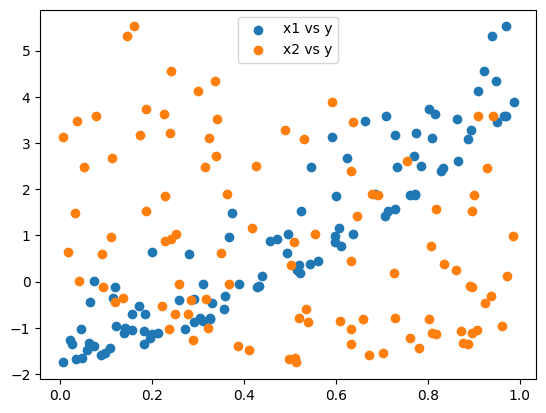

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Генерація 100 випадкових значень ознак x1 та x2
np.random.seed(42)  # Для відтворюваності результатів
x1 = np.random.rand(100)
x2 = np.random.rand(100)

# Функція для обчислення цільової змінної y
def polynomial(x1, x2):
    return 4 * x1**2 + 5 * x2**2 - 2 * x1 * x2 + 3 * x1 - 6 * x2

# Обчислення цільової змінної y
y = polynomial(x1, x2)

# Візуалізація даних
plt.scatter(x1, y, label="x1 vs y")
plt.scatter(x2, y, label="x2 vs y")
plt.legend()
plt.show()

### 2. Згенеруйте додаткові ознаки для кожного степеня за допомогою функції PolynomialFeatures бібліотеки sklearn.

In [2]:
from sklearn.preprocessing import PolynomialFeatures

# Створення об'єкта для поліноміальних ознак 2-го степеня
poly = PolynomialFeatures(degree=2, include_bias=False)

# Перетворення вхідних даних x1, x2 на нові ознаки
X = np.column_stack((x1, x2))
X_poly = poly.fit_transform(X)

print("Оригінальні ознаки:\n", X[:5])
print("Поліноміальні ознаки:\n", X_poly[:5])


Оригінальні ознаки:
 [[0.37454012 0.03142919]
 [0.95071431 0.63641041]
 [0.73199394 0.31435598]
 [0.59865848 0.50857069]
 [0.15601864 0.90756647]]
Поліноміальні ознаки:
 [[0.37454012 0.03142919 0.1402803  0.01177149 0.00098779]
 [0.95071431 0.63641041 0.90385769 0.60504448 0.40501821]
 [0.73199394 0.31435598 0.53581513 0.23010667 0.09881968]
 [0.59865848 0.50857069 0.35839198 0.30446016 0.25864415]
 [0.15601864 0.90756647 0.02434182 0.14159729 0.8236769 ]]


### 3. Реалізуйте функції для методів градієнтного спуску:

- Реалізувати функцію polynomial_regression_gradient_descent() для обчислення коефіцієнтів поліноміальної регресії методом градієнтного спуску.
- Реалізувати функцію polynomial_regression_SGD() варіанта SGD метода градієнтного спуску.
- Реалізувати функцію polynomial_regression_rmsprop() варіанта RMSProp метода градієнтного спуску.
- Реалізувати функцію polynomial_regression_adam() варіанта Adam метода градієнтного спуску.
- Реалізувати функцію polynomial_regression_nadam() варіанта Nadam метода градієнтного спуску.

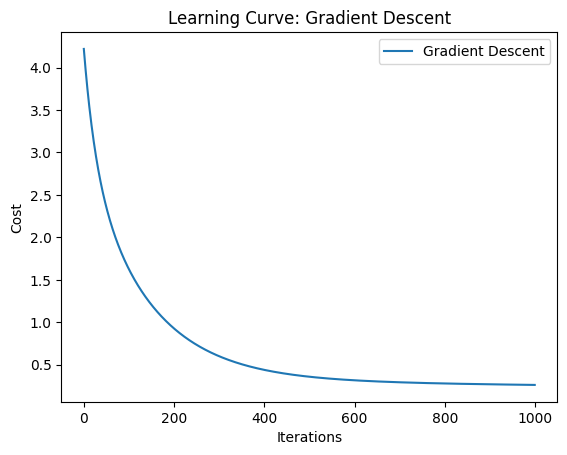

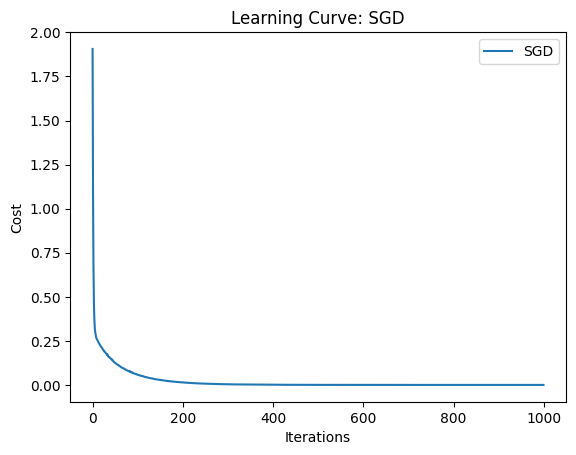

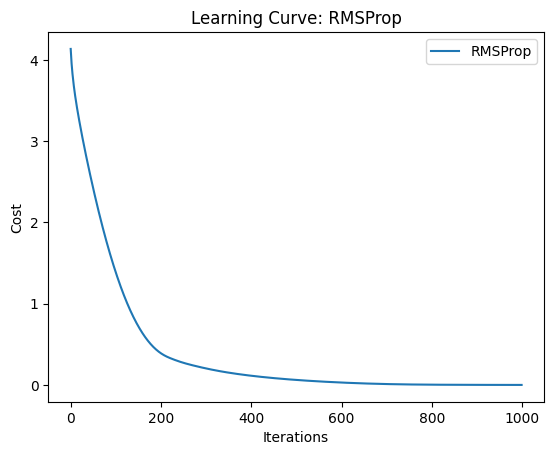

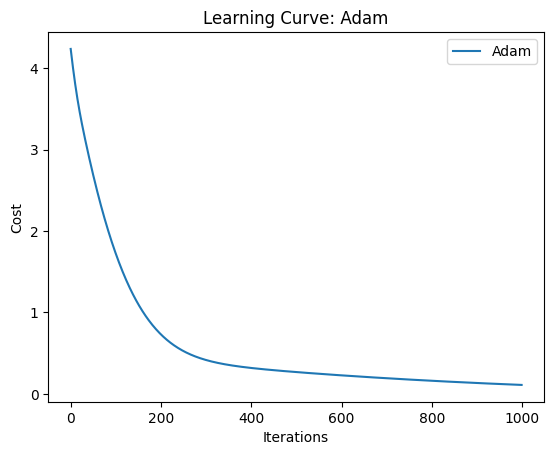

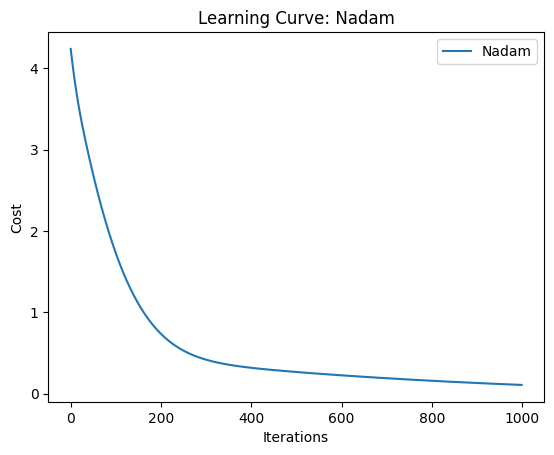

Theta (Gradient Descent): [ 2.34914219 -1.57024213  2.64385099  0.50693081 -0.84327623]
Theta (SGD): [ 2.99048644 -5.9899973   4.00843155 -1.99857564  4.98987691]
Theta (RMSProp): [ 2.83691887 -5.82754306  4.12899285 -1.97238278  4.80822696]
Theta (Adam): [ 2.48431531 -3.80803288  2.86262083  0.81442481  1.58569333]
Theta (Nadam): [ 2.48608989 -3.82643457  2.86173855  0.81843447  1.60630124]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Змінна для кількості ітерацій
iterations = 1000
learning_rate = 0.01

# Функція для обчислення помилки (середньоквадратичної помилки)
def compute_cost(X, y, theta):
    m = len(y)
    return (1/m) * np.sum((X.dot(theta) - y)**2)

# Функція для виведення результатів
def plot_learning_curve(cost_history, method_name):
    plt.plot(range(len(cost_history)), cost_history, label=method_name)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title(f"Learning Curve: {method_name}")
    plt.legend()
    plt.show()

# Базовий градієнтний спуск
def polynomial_regression_gradient_descent(X, y, lr=0.01, iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    for i in range(iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= lr * gradients
        cost_history.append(compute_cost(X, y, theta))
    plot_learning_curve(cost_history, "Gradient Descent")
    return theta

# SGD
def polynomial_regression_SGD(X, y, lr=0.01, iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    for i in range(iterations):
        for j in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= lr * gradients
        cost_history.append(compute_cost(X, y, theta))
    plot_learning_curve(cost_history, "SGD")
    return theta

# RMSProp
def polynomial_regression_rmsprop(X, y, lr=0.01, iterations=1000, beta=0.9, epsilon=1e-8):
    m, n = X.shape
    theta = np.zeros(n)
    s = np.zeros(n)
    cost_history = []
    for i in range(iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        s = beta * s + (1 - beta) * gradients**2
        theta -= lr * gradients / (np.sqrt(s) + epsilon)
        cost_history.append(compute_cost(X, y, theta))
    plot_learning_curve(cost_history, "RMSProp")
    return theta

# Adam
def polynomial_regression_adam(X, y, lr=0.01, iterations=1000, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m, n = X.shape
    theta = np.zeros(n)
    v = np.zeros(n)
    s = np.zeros(n)
    cost_history = []
    for i in range(iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        v = beta1 * v + (1 - beta1) * gradients
        s = beta2 * s + (1 - beta2) * gradients**2
        v_corrected = v / (1 - beta1**(i + 1))
        s_corrected = s / (1 - beta2**(i + 1))
        theta -= lr * v_corrected / (np.sqrt(s_corrected) + epsilon)
        cost_history.append(compute_cost(X, y, theta))
    plot_learning_curve(cost_history, "Adam")
    return theta

# Nadam
def polynomial_regression_nadam(X, y, lr=0.01, iterations=1000, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m, n = X.shape
    theta = np.zeros(n)
    v = np.zeros(n)
    s = np.zeros(n)
    cost_history = []
    for i in range(iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        v = beta1 * v + (1 - beta1) * gradients
        s = beta2 * s + (1 - beta2) * gradients**2
        v_corrected = v / (1 - beta1**(i + 1))
        s_corrected = s / (1 - beta2**(i + 1))
        theta -= lr * (beta1 * v_corrected + (1 - beta1) * gradients) / (np.sqrt(s_corrected) + epsilon)
        cost_history.append(compute_cost(X, y, theta))
    plot_learning_curve(cost_history, "Nadam")
    return theta

# Виклик кожного методу
theta_gd = polynomial_regression_gradient_descent(X_poly, y, lr=0.01, iterations=1000)
theta_sgd = polynomial_regression_SGD(X_poly, y, lr=0.01, iterations=1000)
theta_rmsprop = polynomial_regression_rmsprop(X_poly, y, lr=0.01, iterations=1000)
theta_adam = polynomial_regression_adam(X_poly, y, lr=0.01, iterations=1000)
theta_nadam = polynomial_regression_nadam(X_poly, y, lr=0.01, iterations=1000)

print("Theta (Gradient Descent):", theta_gd)
print("Theta (SGD):", theta_sgd)
print("Theta (RMSProp):", theta_rmsprop)
print("Theta (Adam):", theta_adam)
print("Theta (Nadam):", theta_nadam)


### 4. Обчисліть час роботи реалізованих функцій за допомогою функції %timeit.

Gradient Descent time:


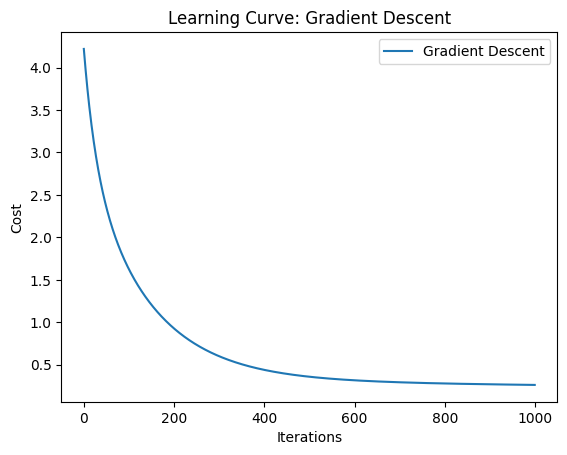

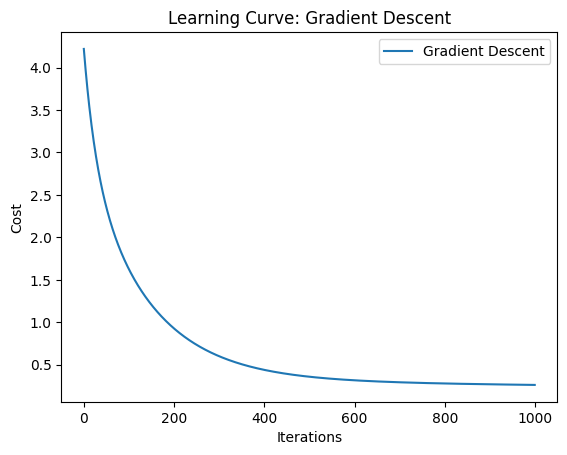

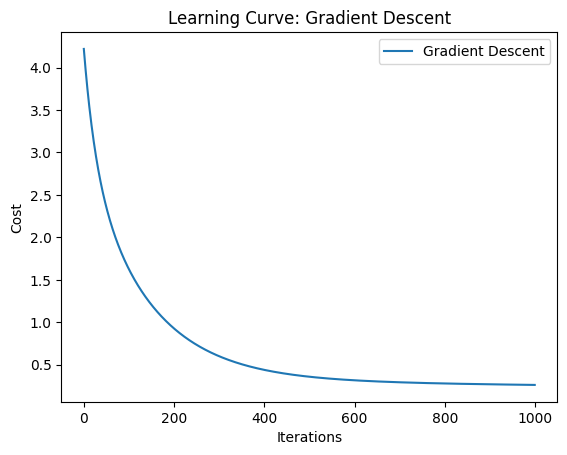

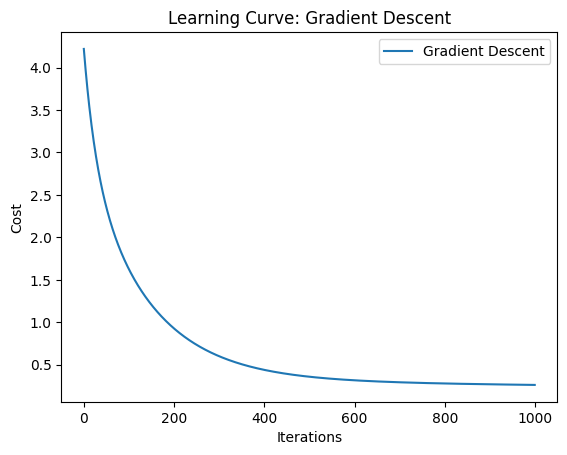

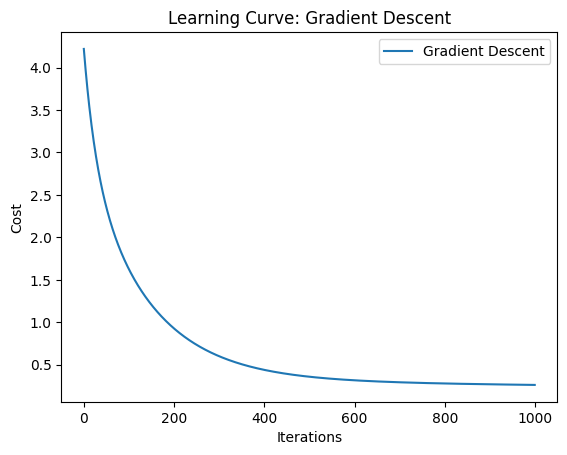

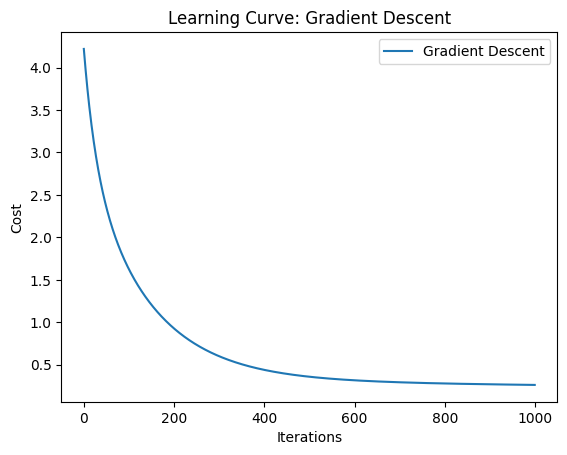

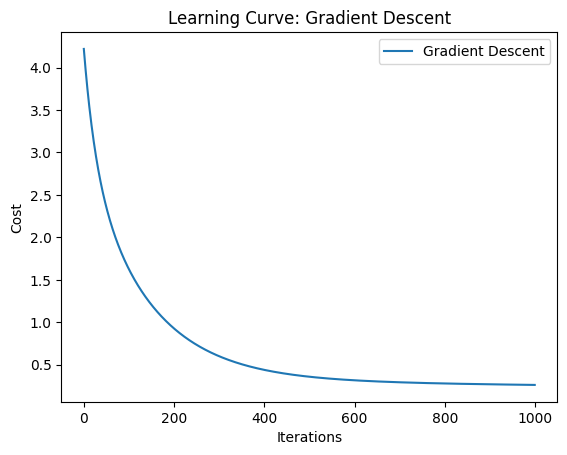

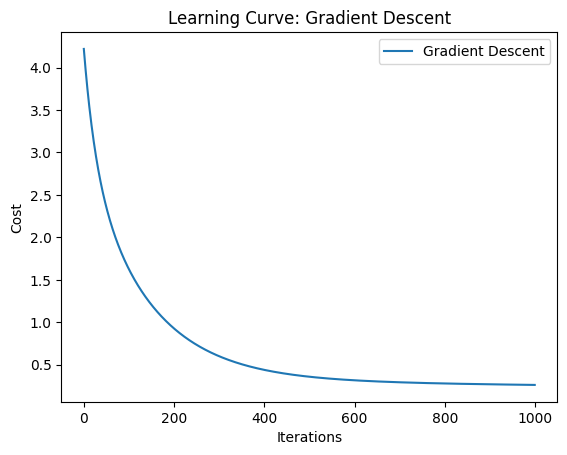

410 ms ± 21.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
SGD time:


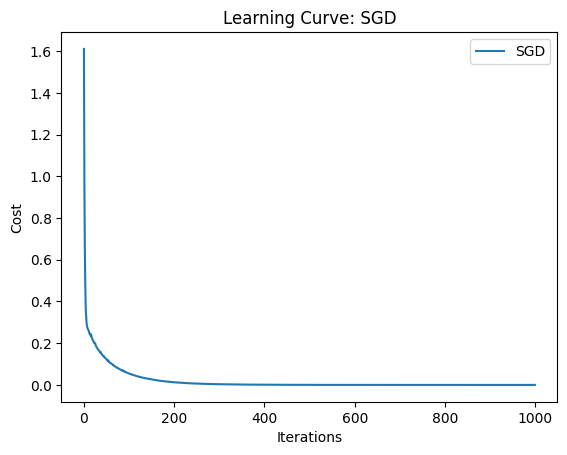

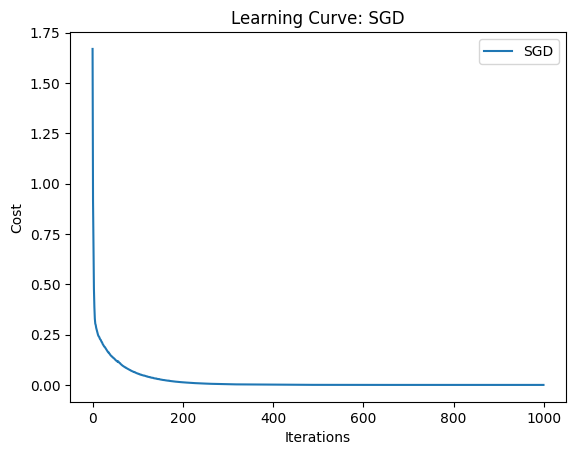

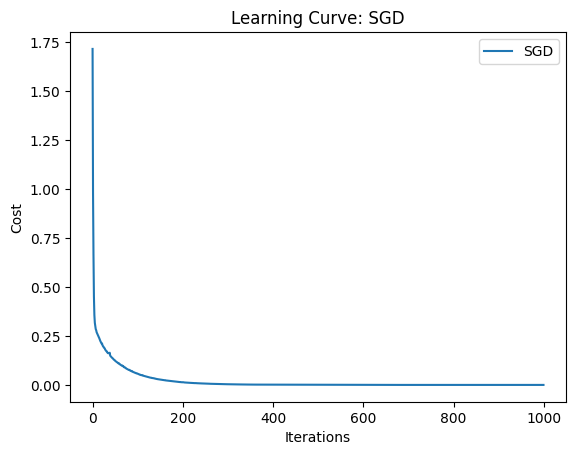

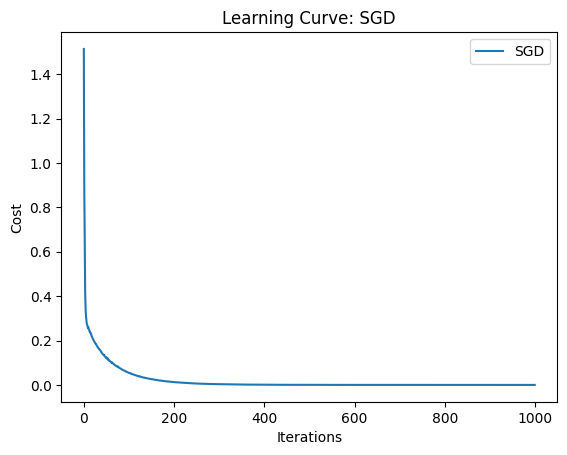

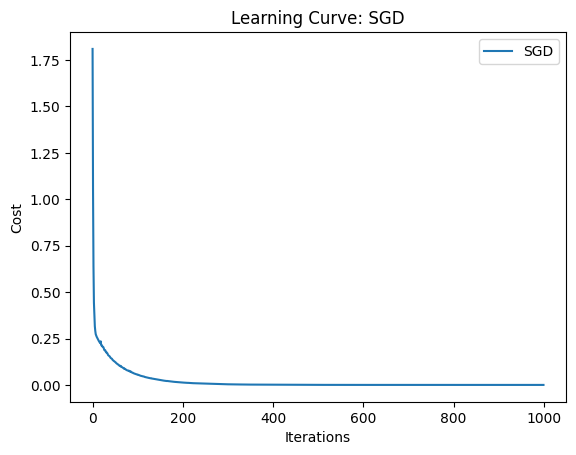

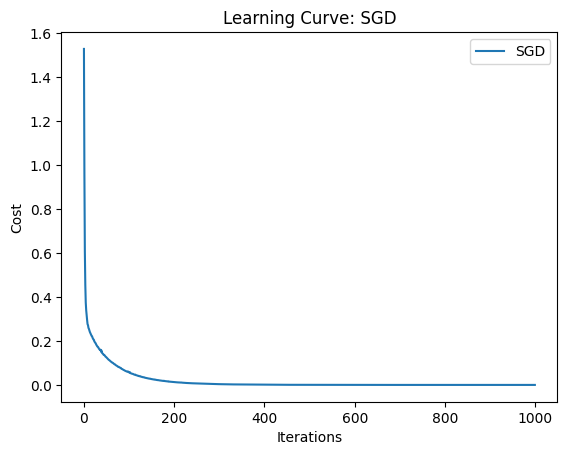

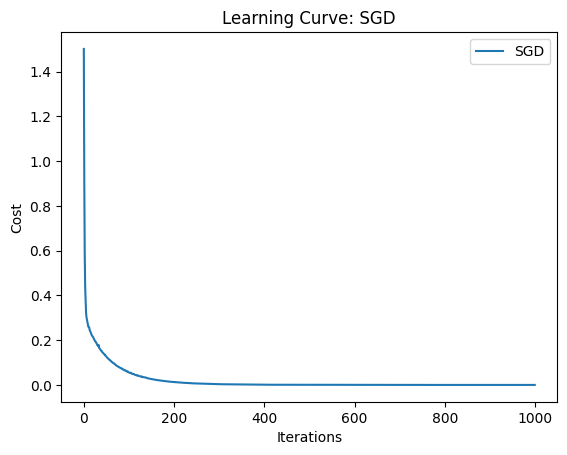

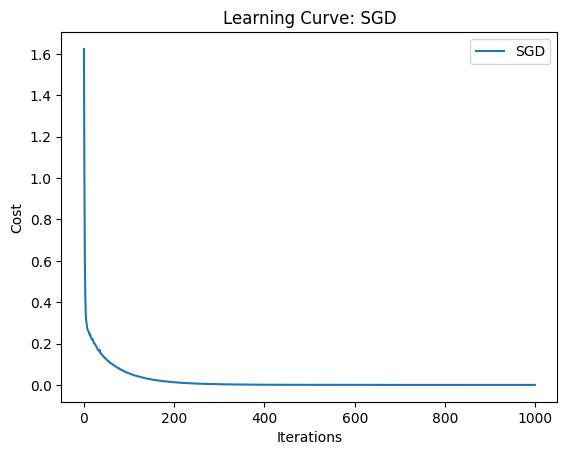

1.41 s ± 114 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
RMSProp time:


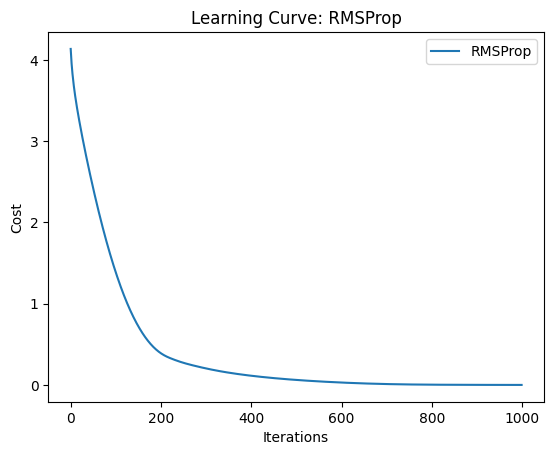

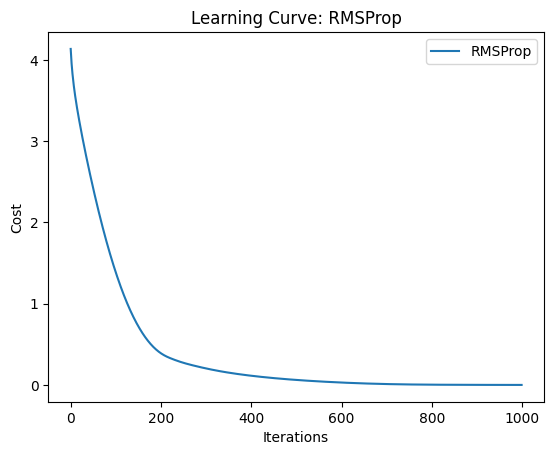

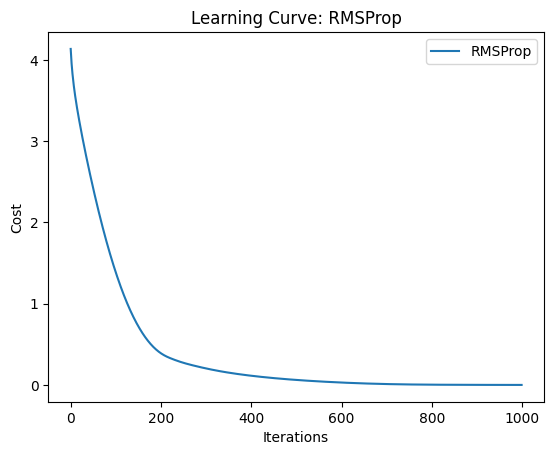

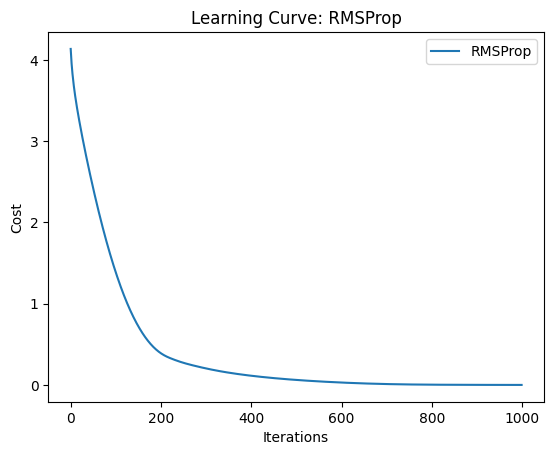

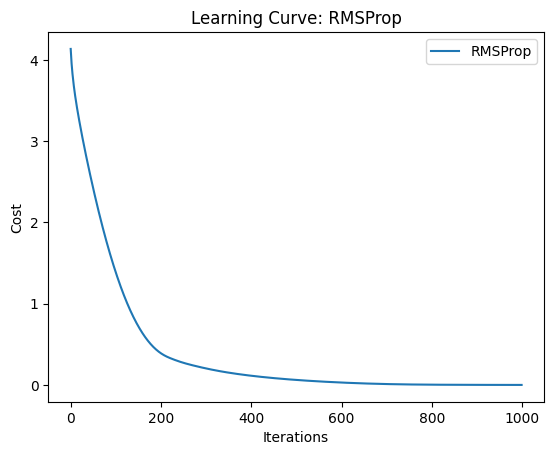

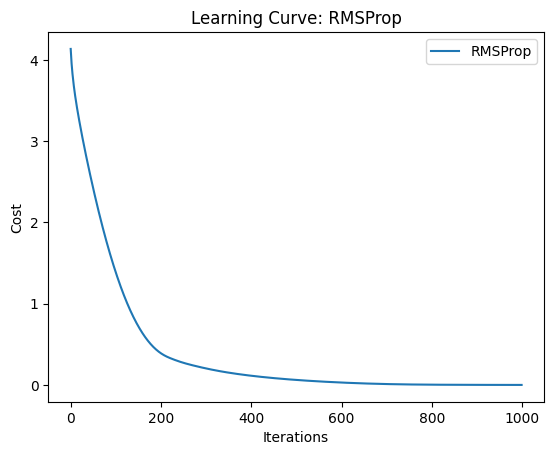

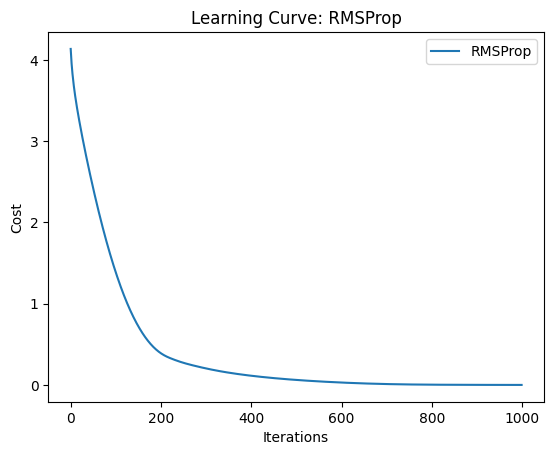

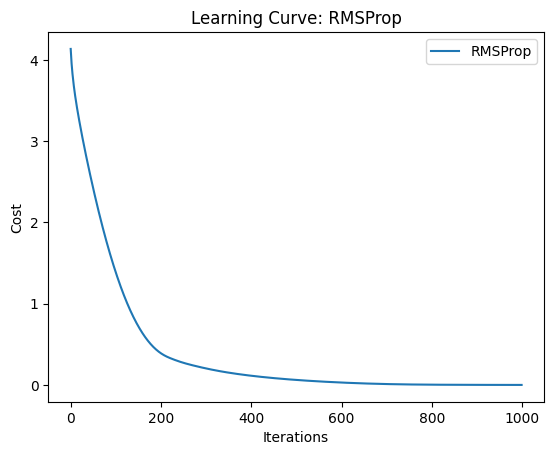

368 ms ± 32.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Adam time:


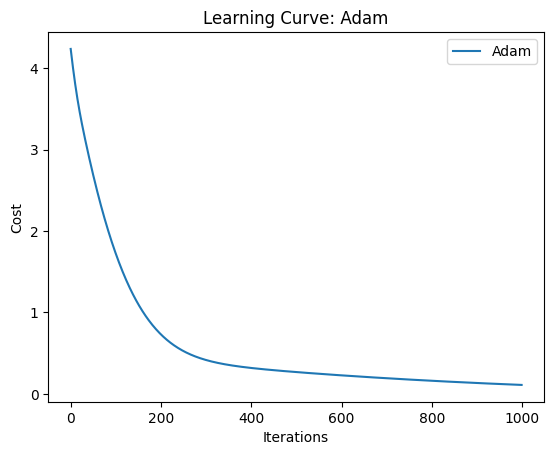

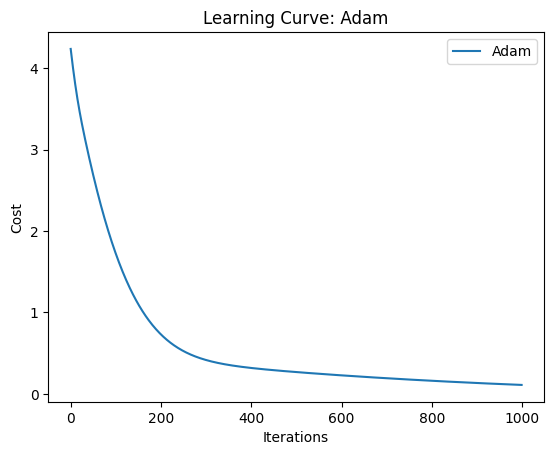

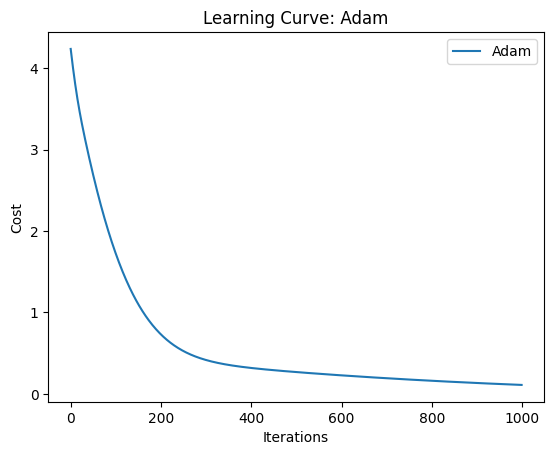

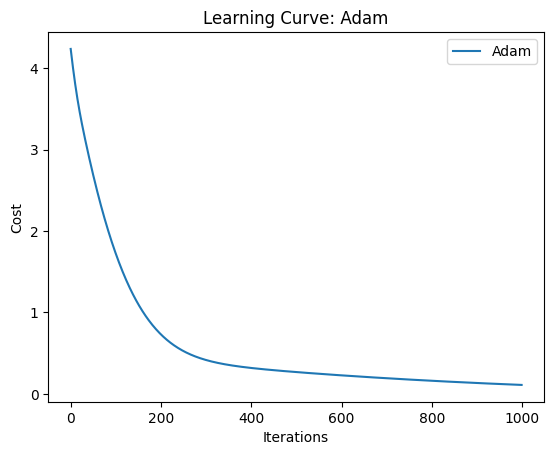

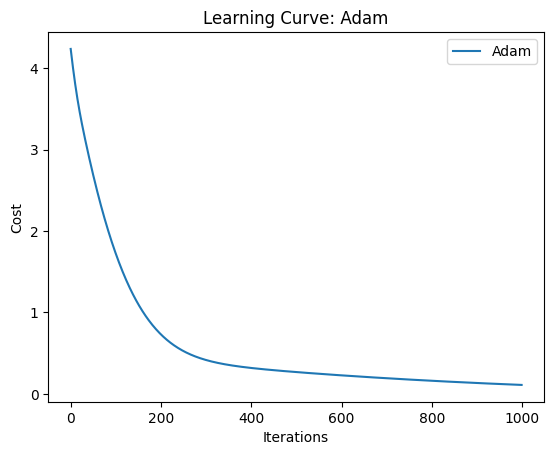

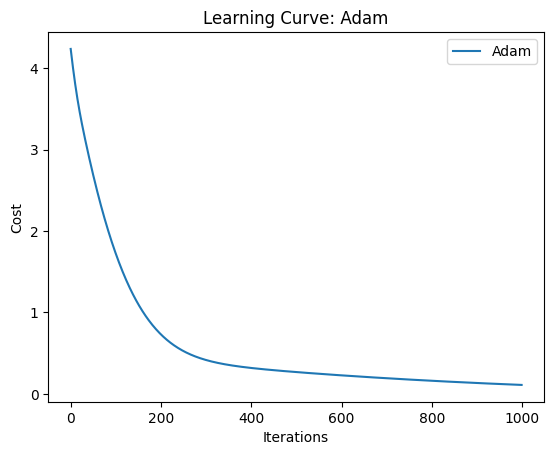

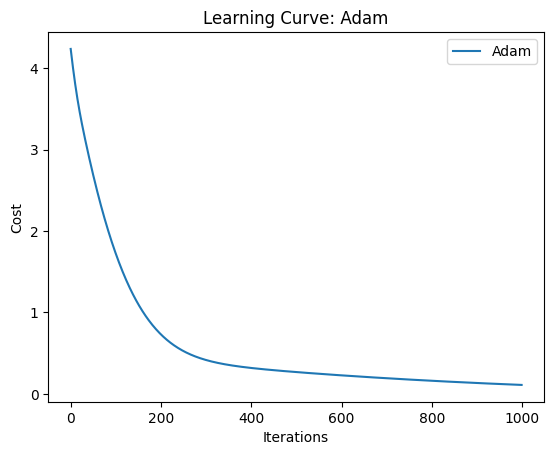

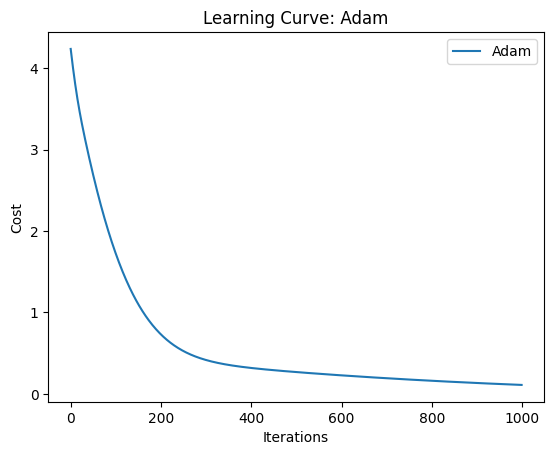

270 ms ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Nadam time:


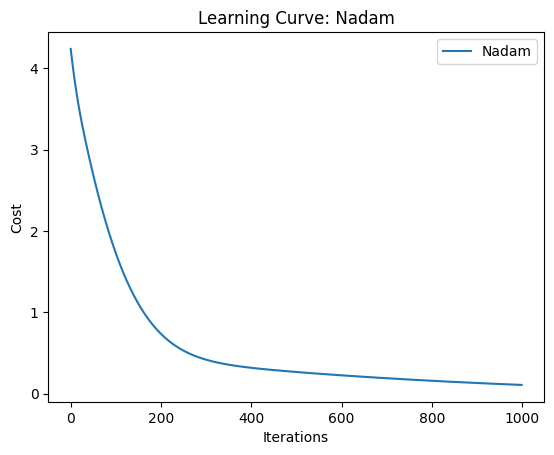

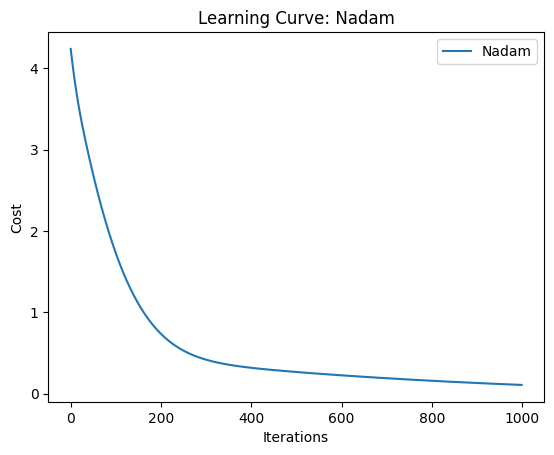

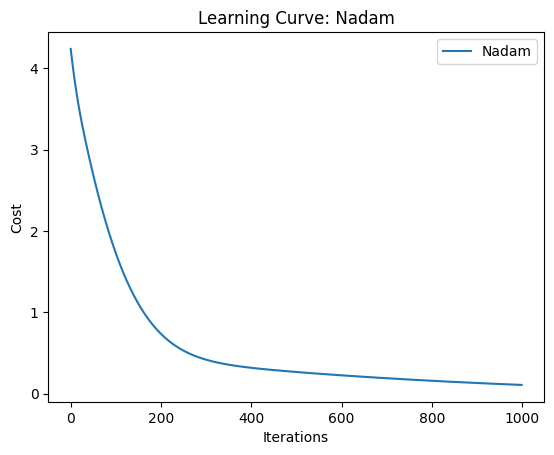

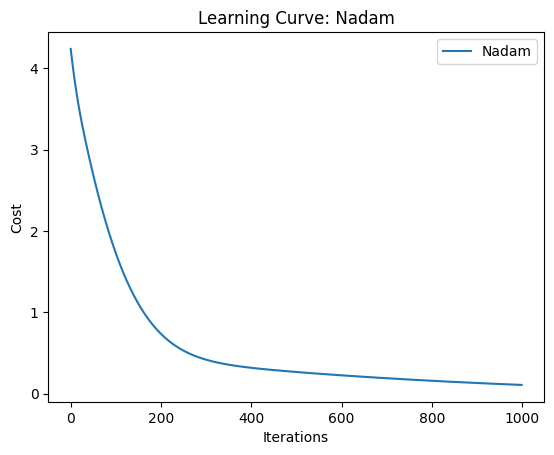

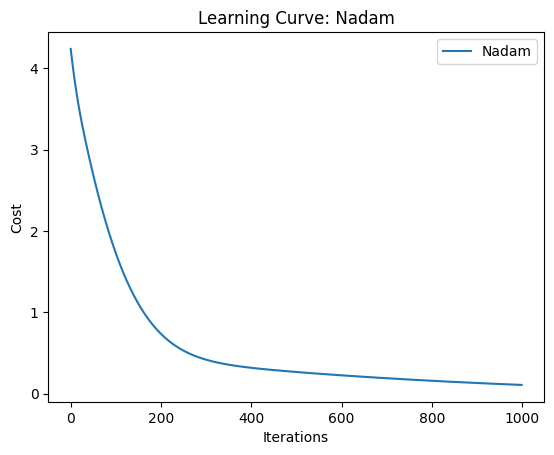

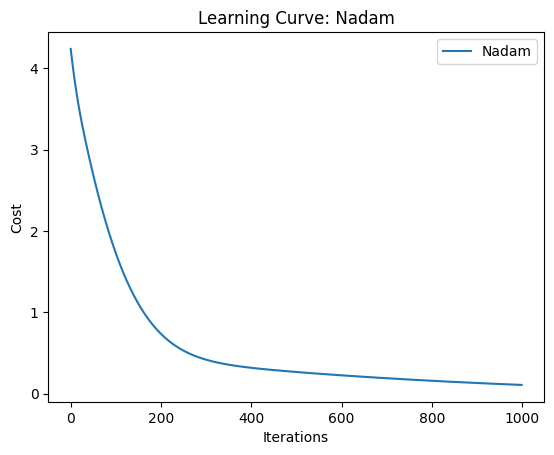

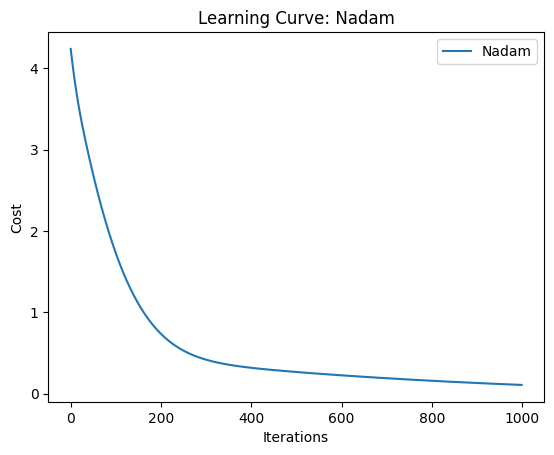

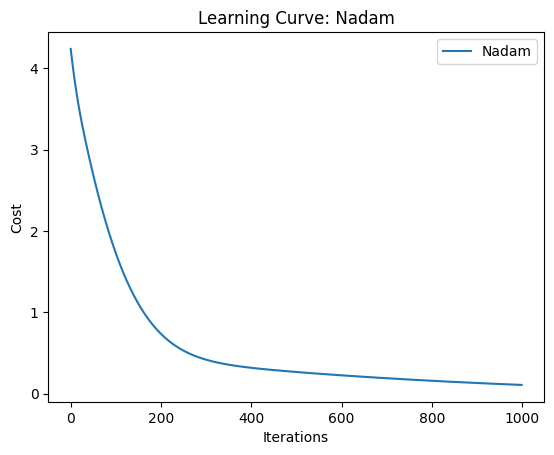

281 ms ± 16.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
# Вимірювання часу виконання для кожного методу
print("Gradient Descent time:")
%timeit polynomial_regression_gradient_descent(X_poly, y, lr=0.01, iterations=1000)

print("SGD time:")
%timeit polynomial_regression_SGD(X_poly, y, lr=0.01, iterations=1000)

print("RMSProp time:")
%timeit polynomial_regression_rmsprop(X_poly, y, lr=0.01, iterations=1000)

print("Adam time:")
%timeit polynomial_regression_adam(X_poly, y, lr=0.01, iterations=1000)

print("Nadam time:")
%timeit polynomial_regression_nadam(X_poly, y, lr=0.01, iterations=1000)


### 5. Підбереріть оптимальну кількість ітерацій кожного з варіантів метода.

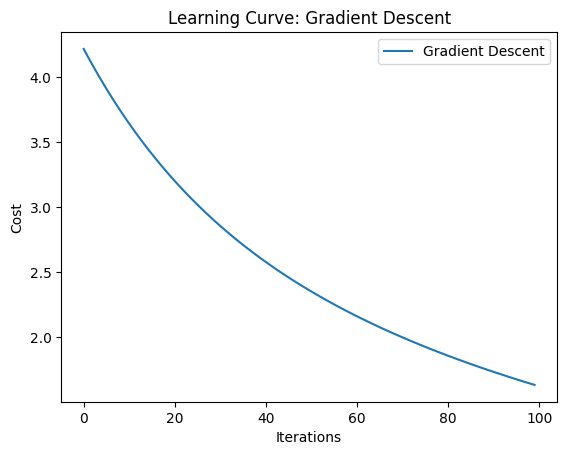

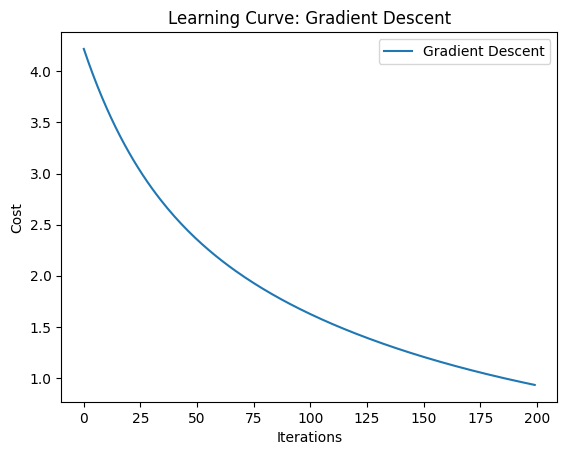

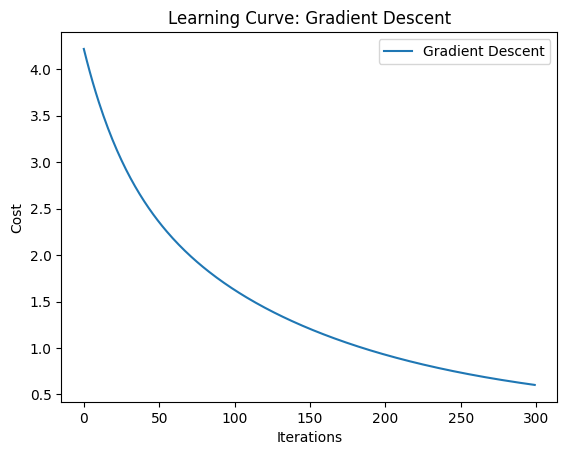

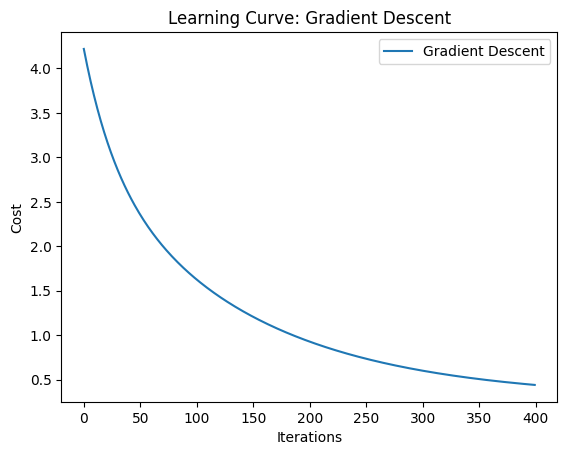

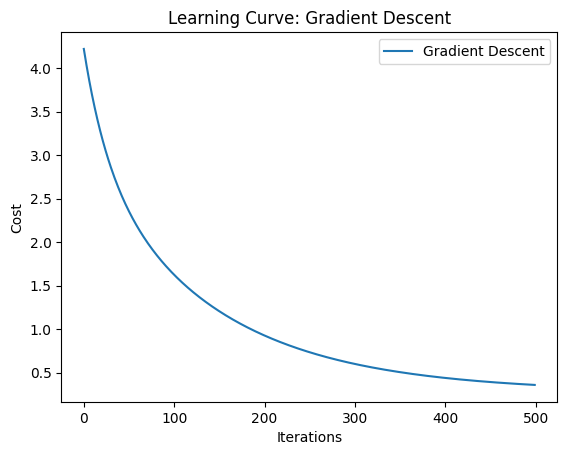

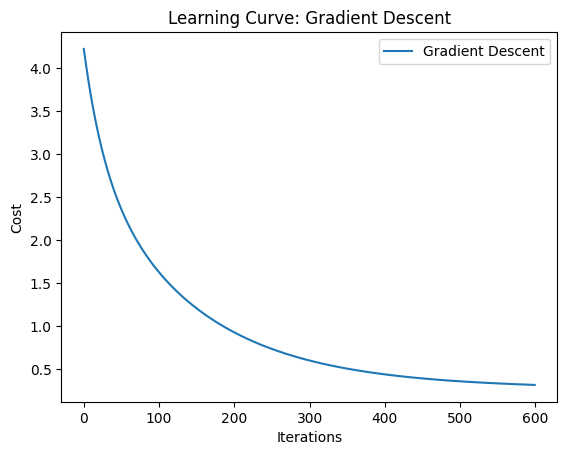

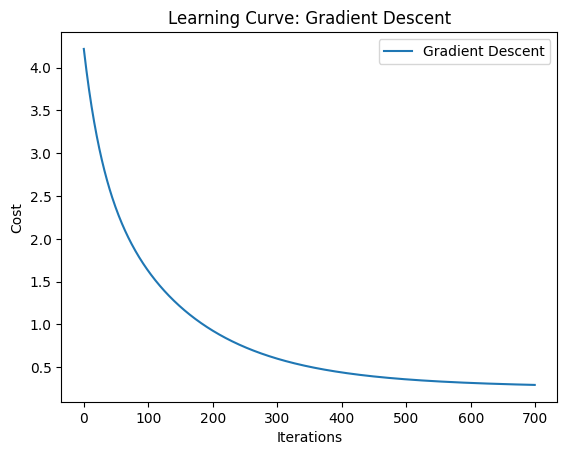

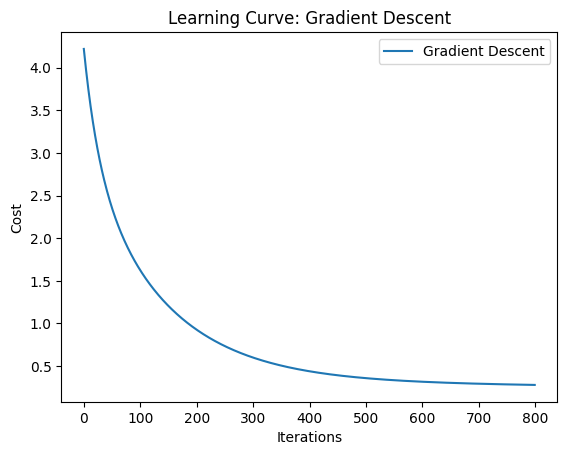

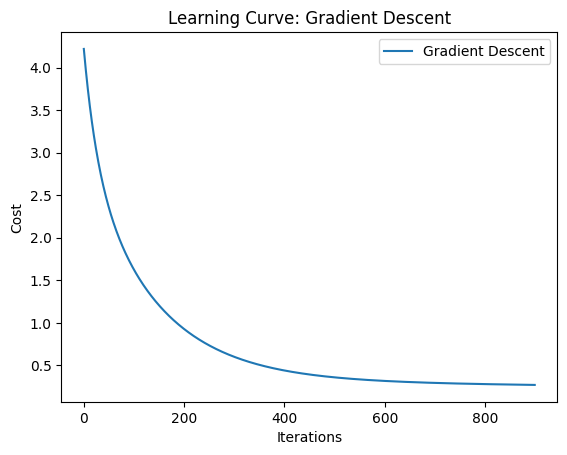

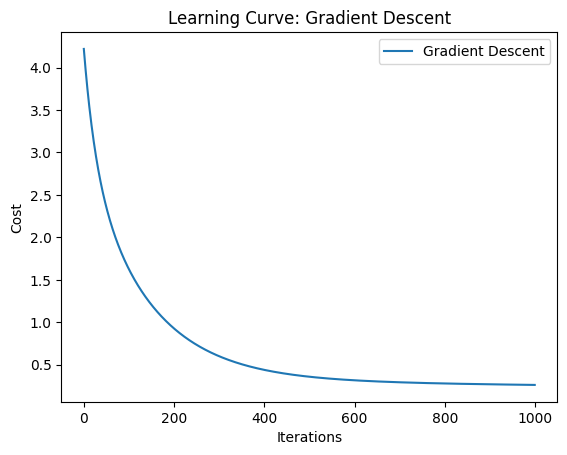

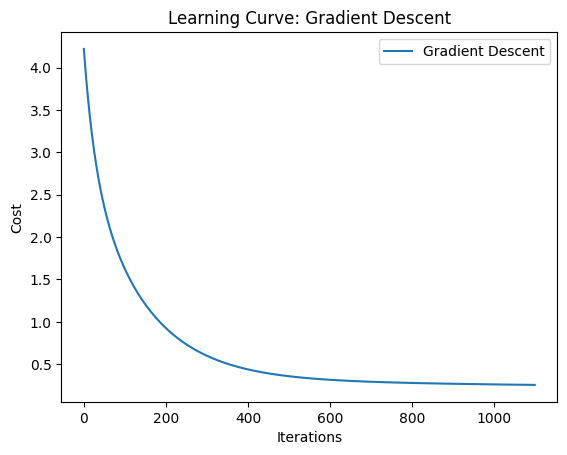

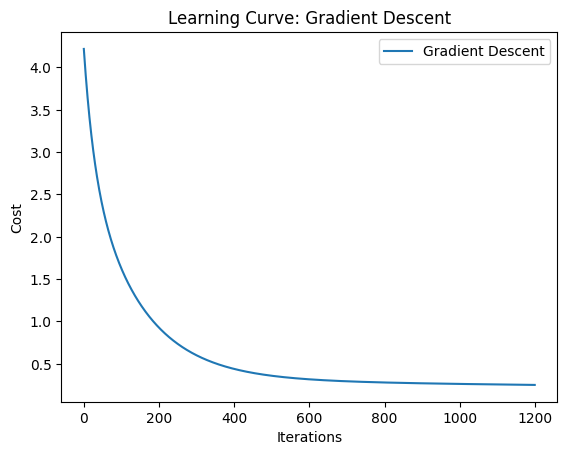

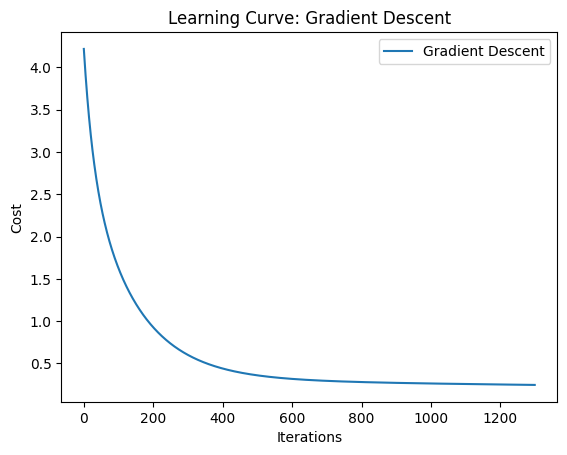

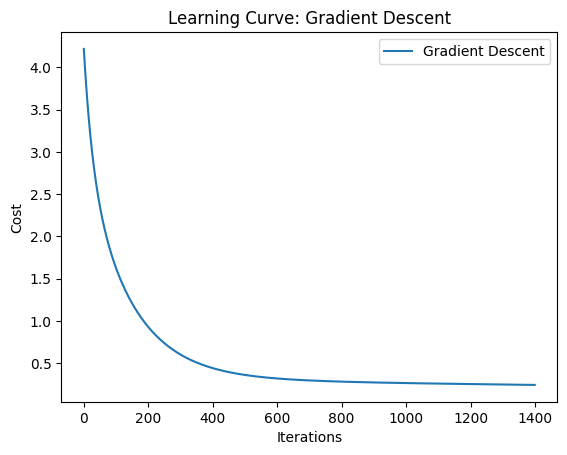

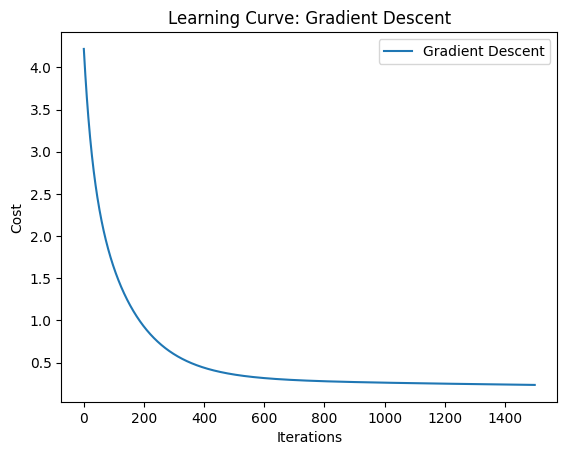

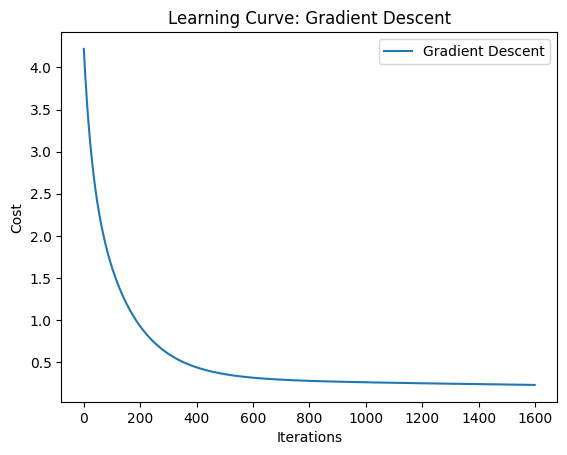

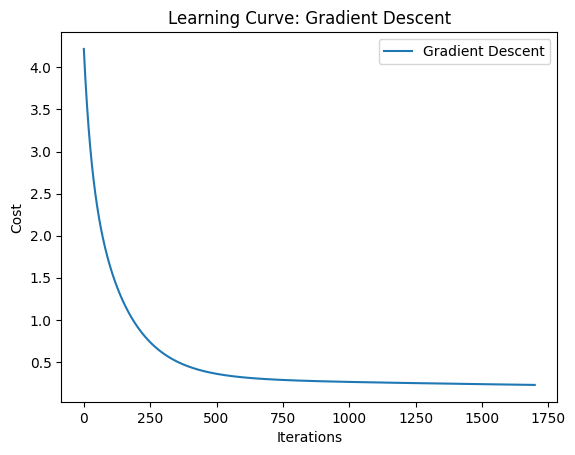

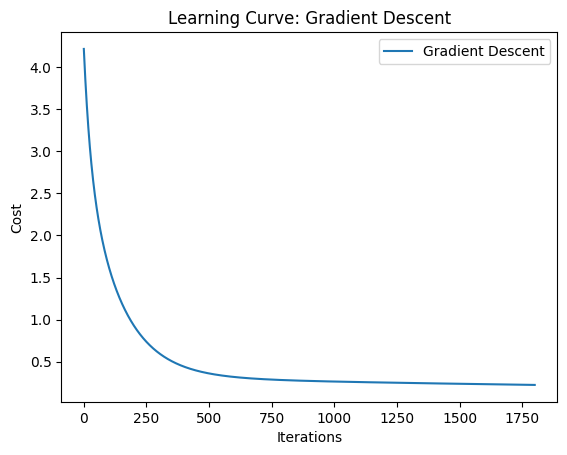

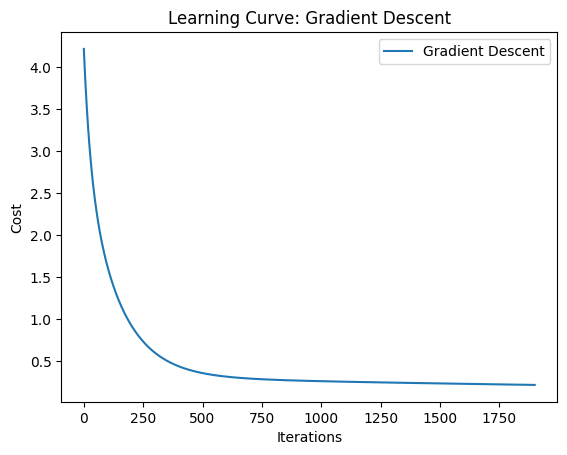

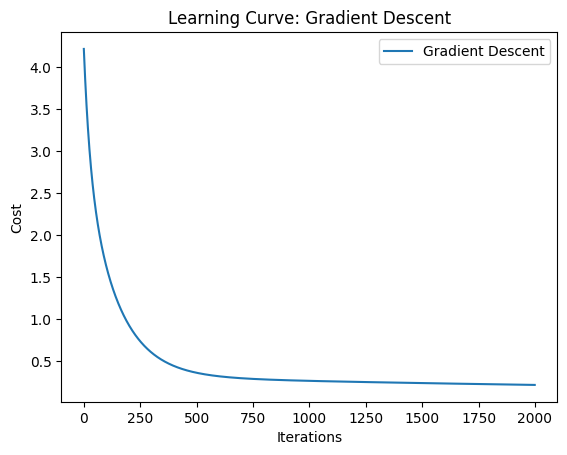

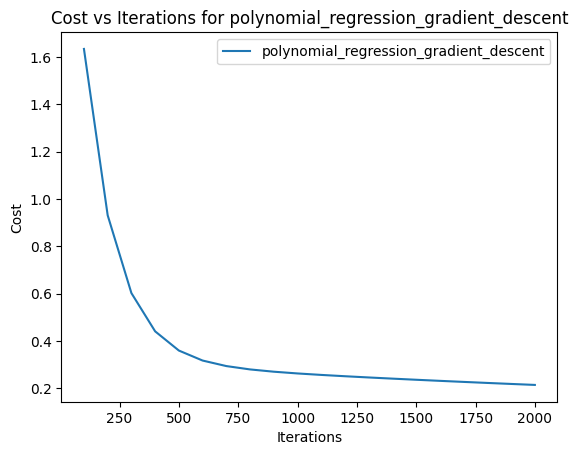

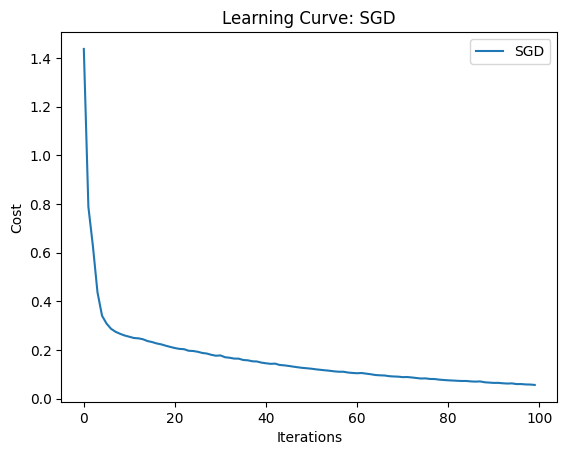

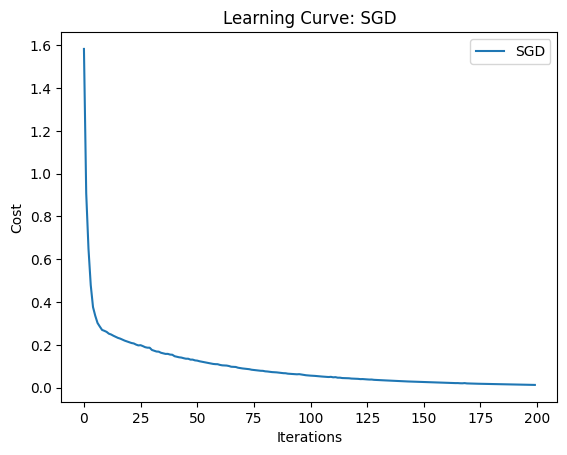

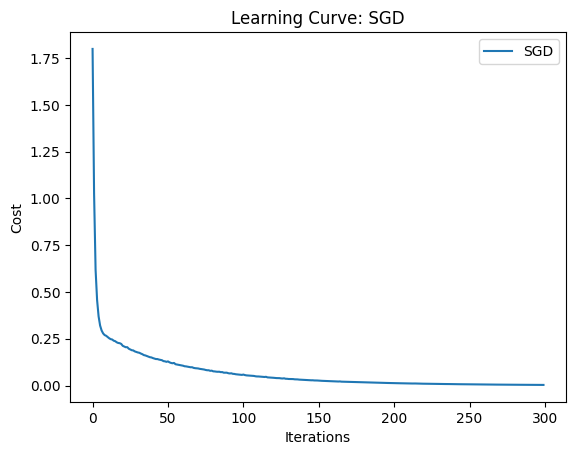

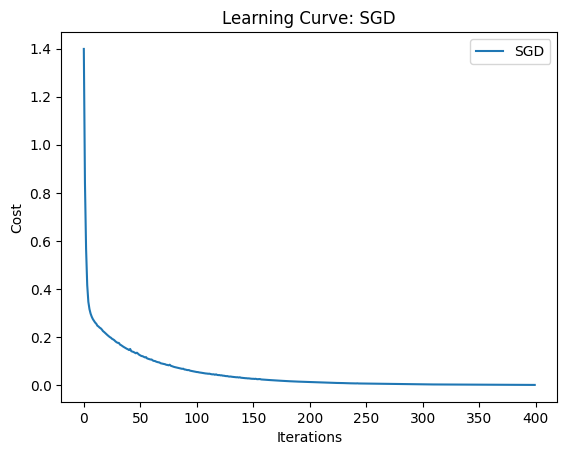

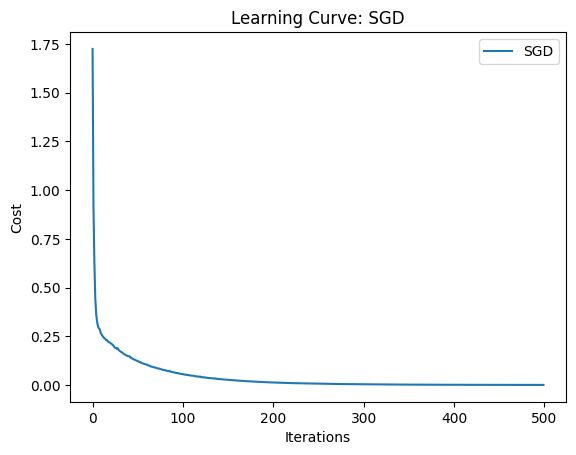

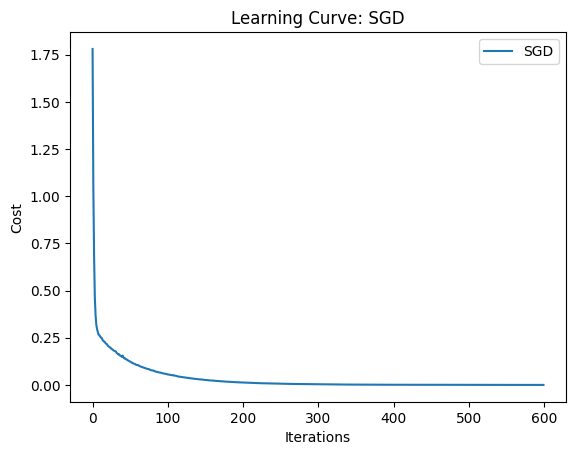

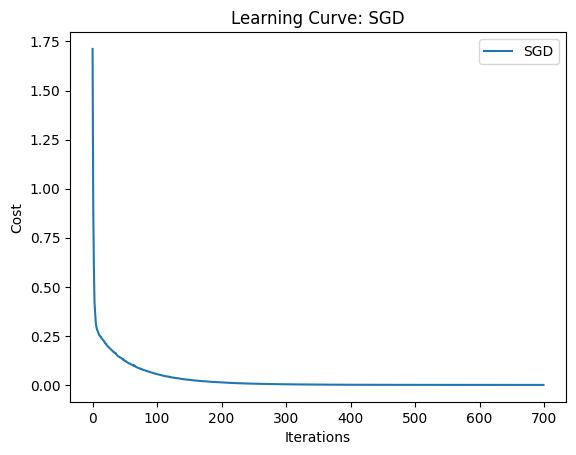

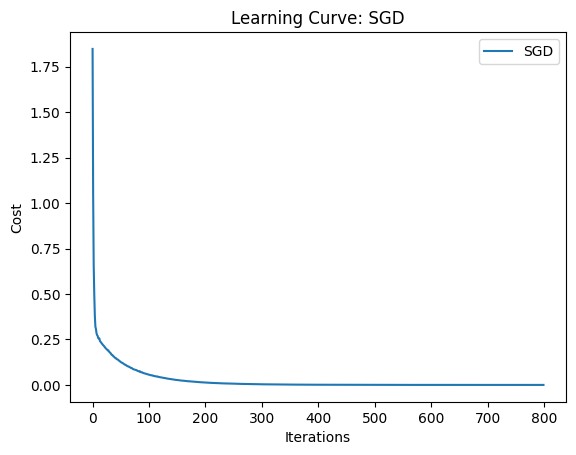

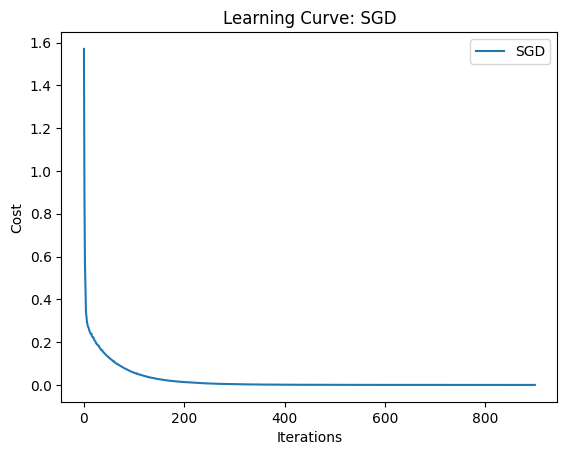

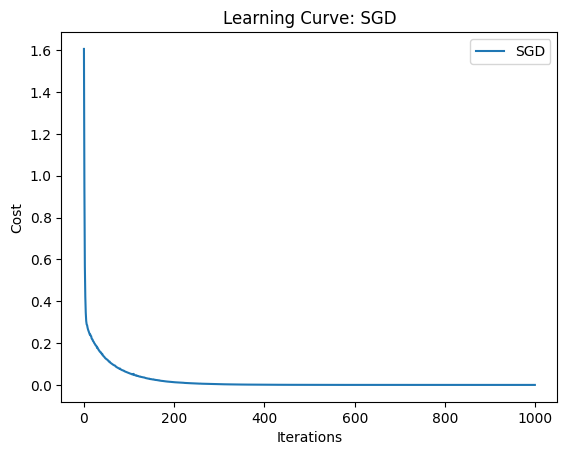

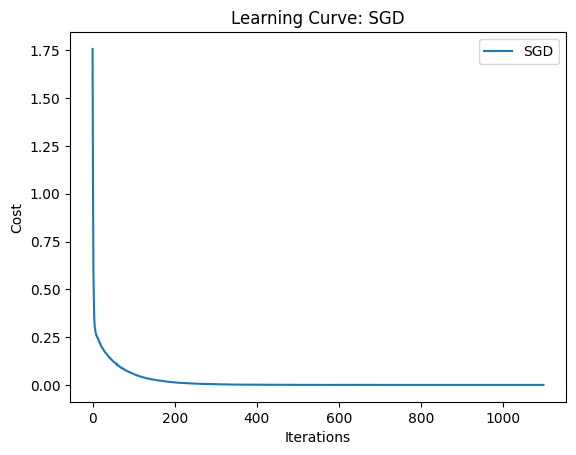

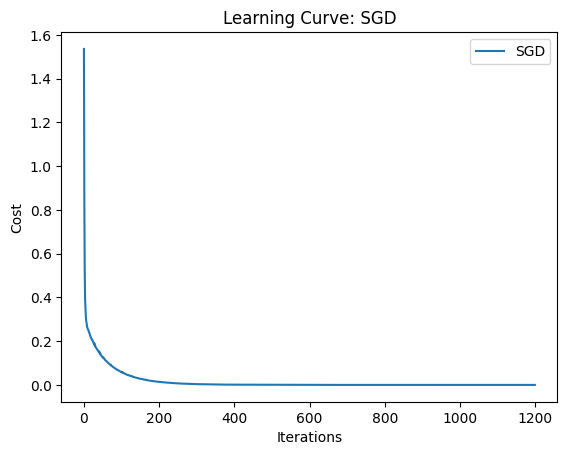

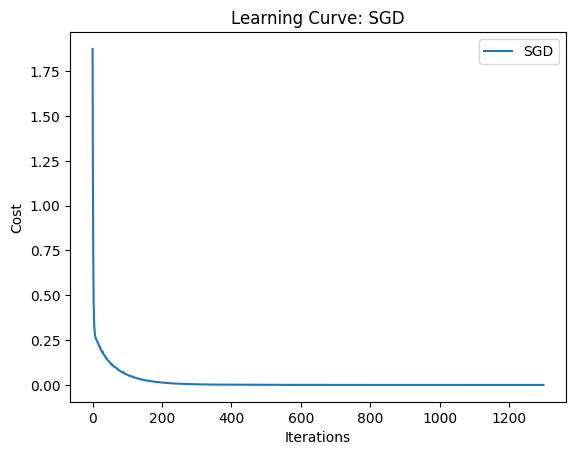

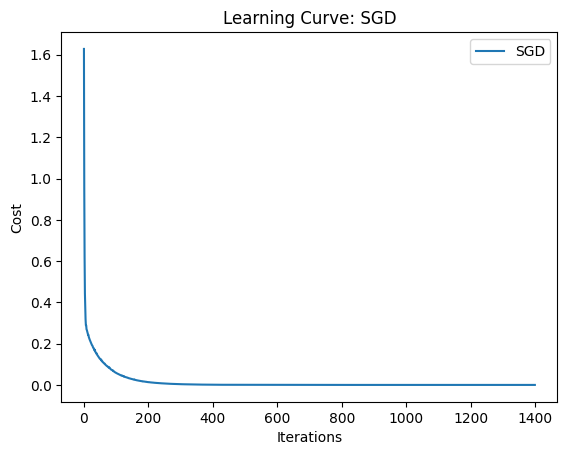

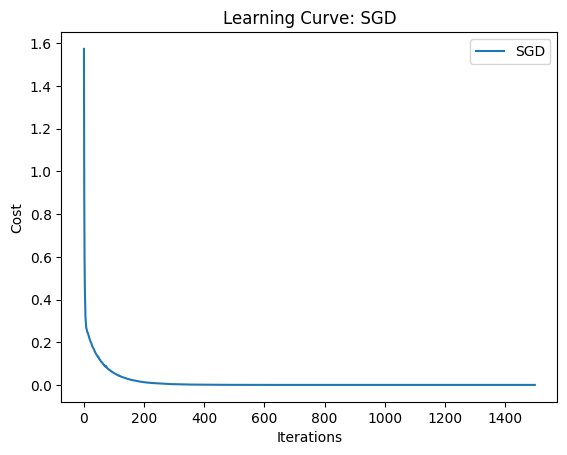

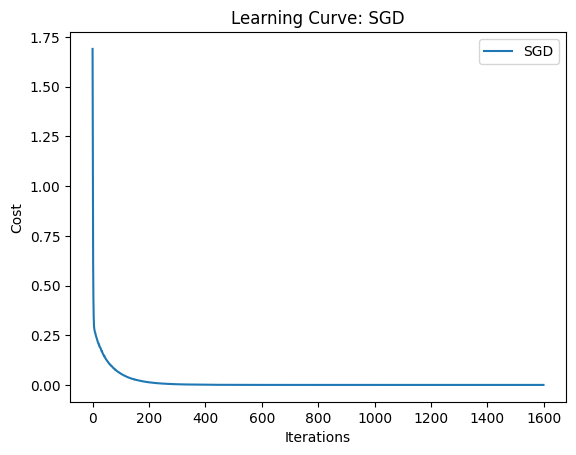

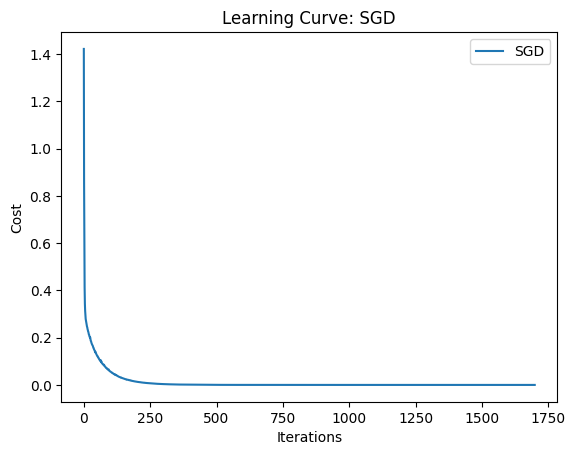

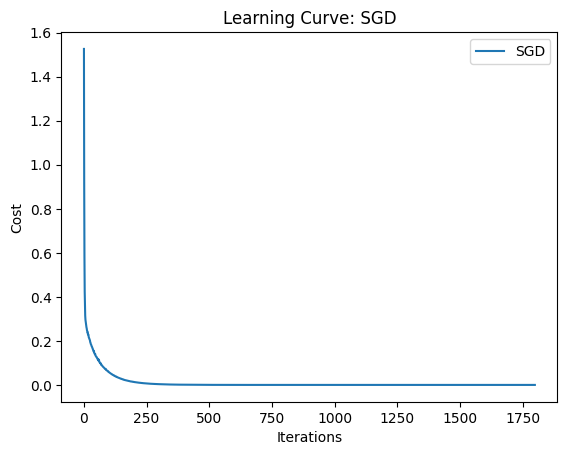

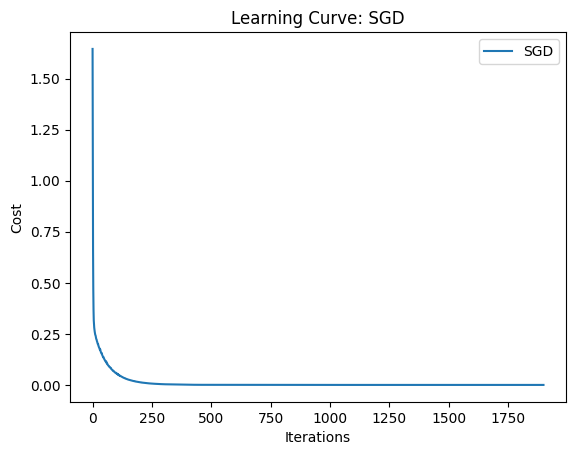

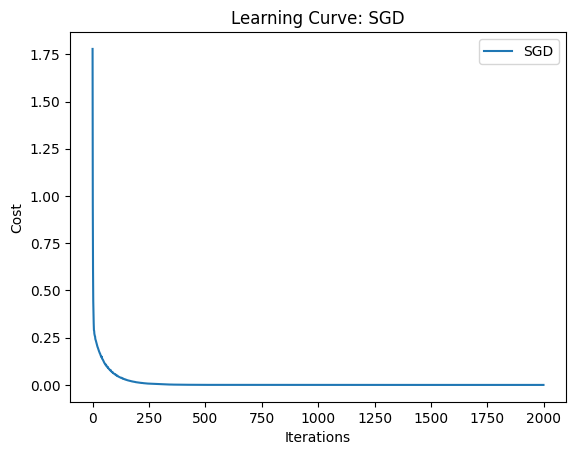

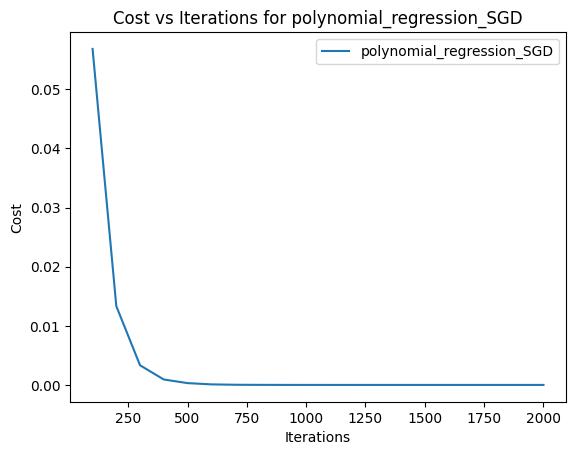

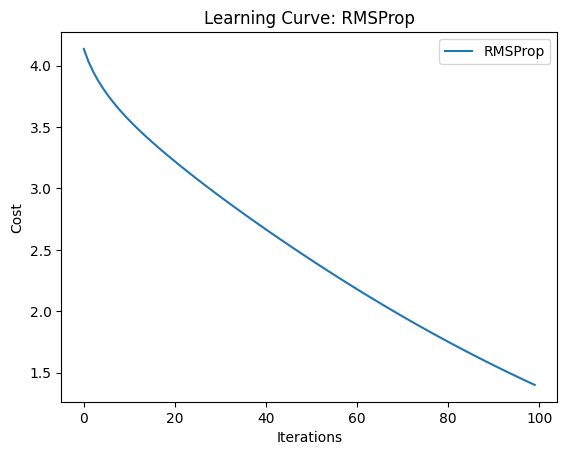

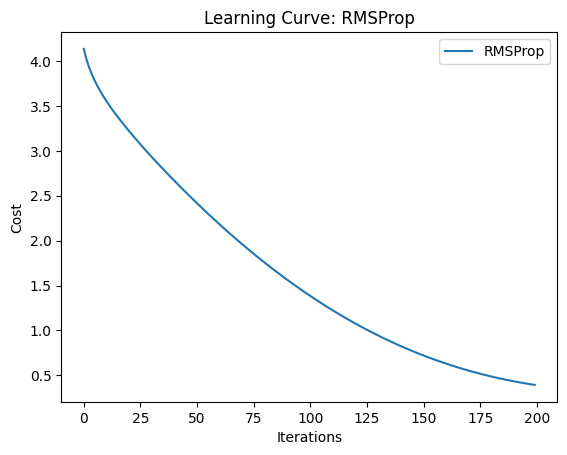

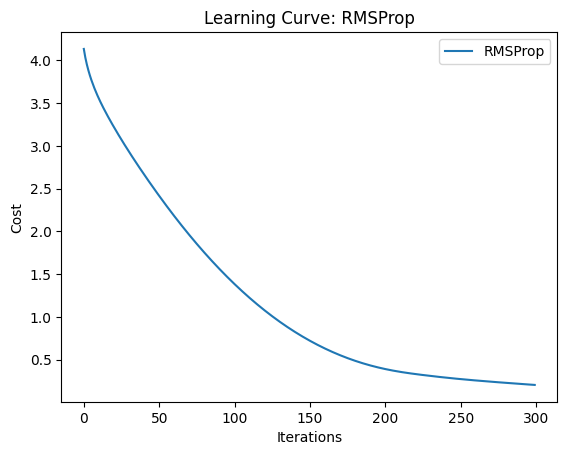

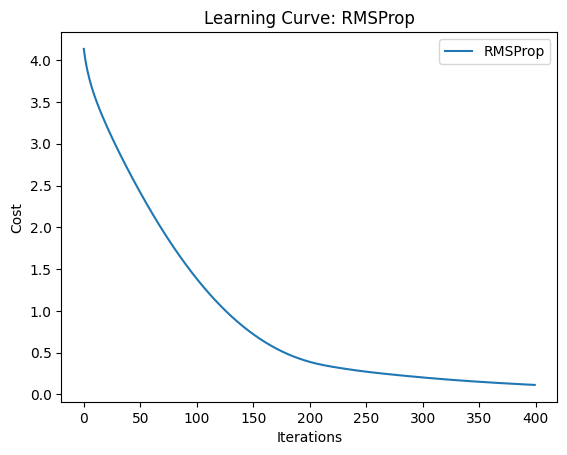

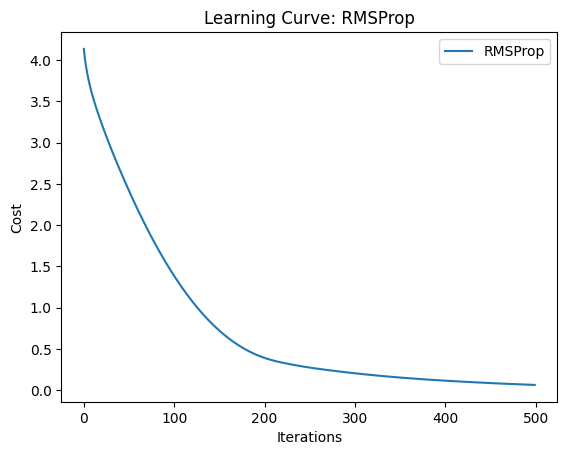

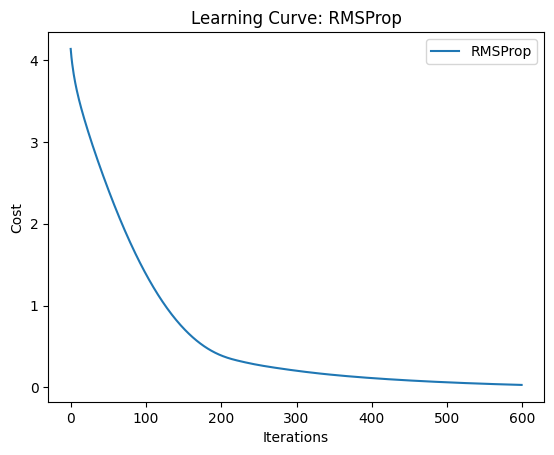

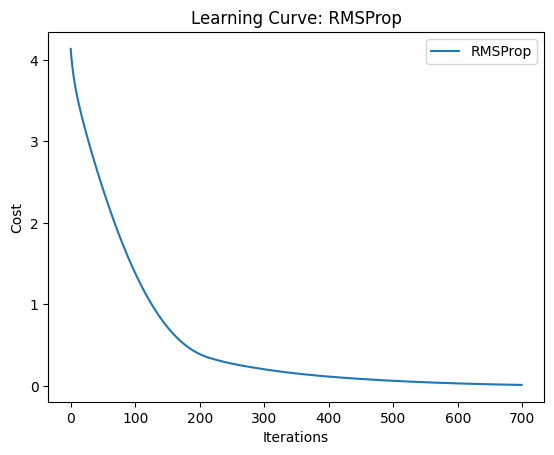

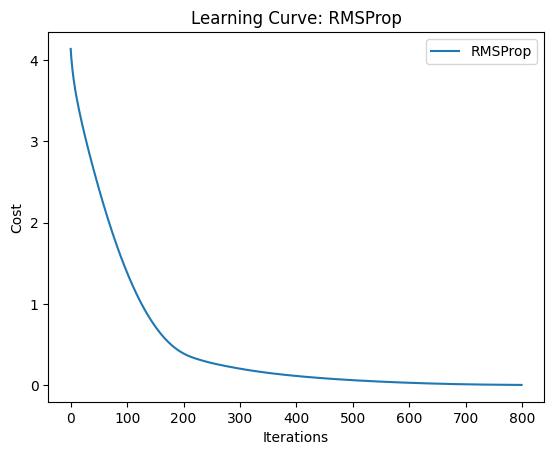

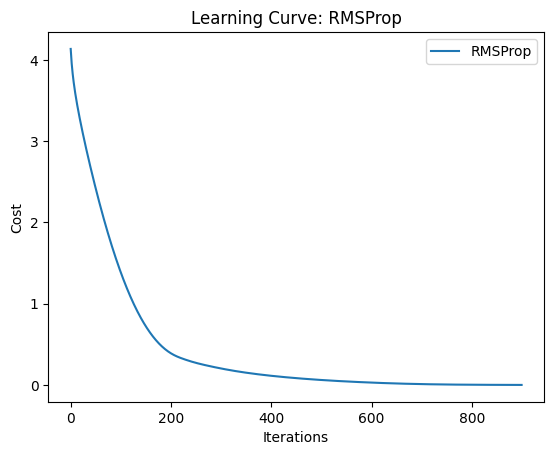

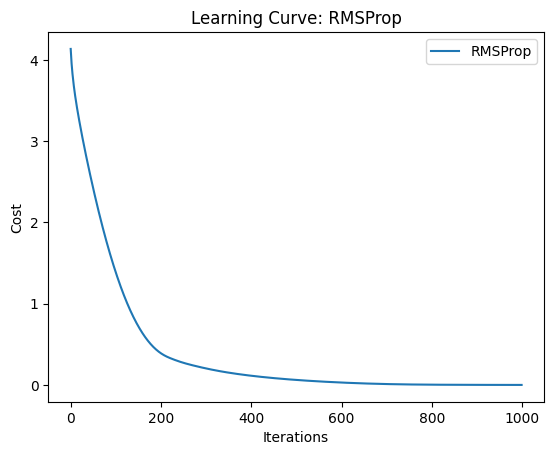

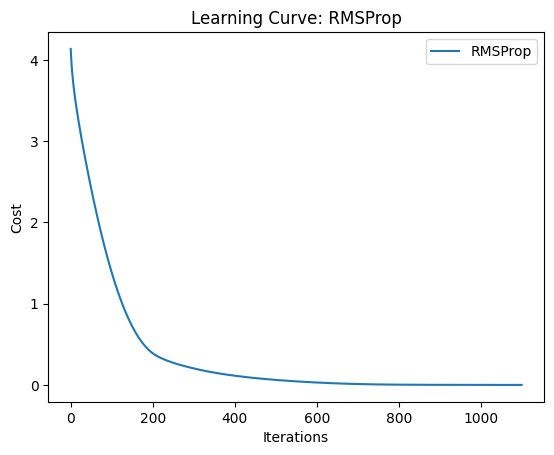

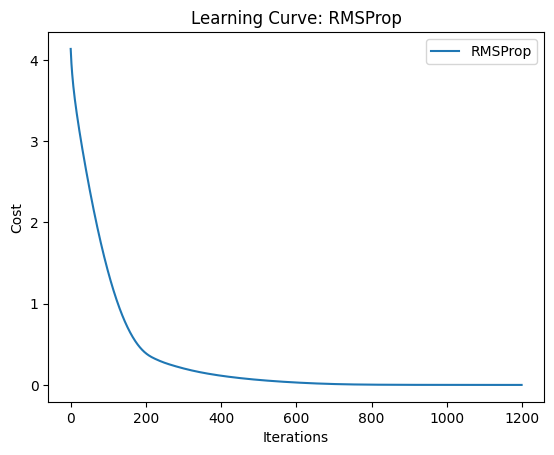

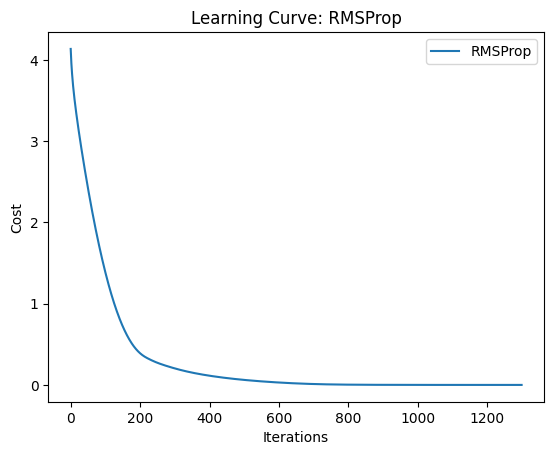

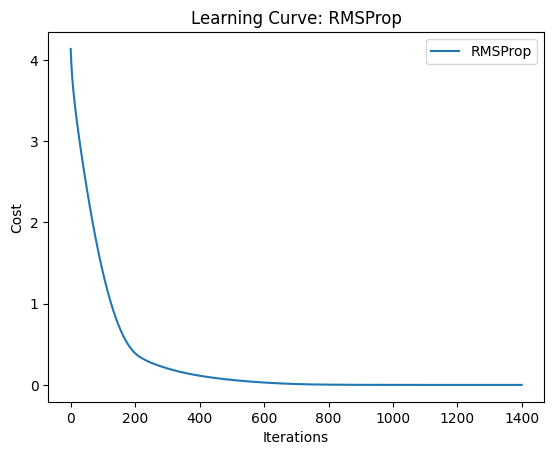

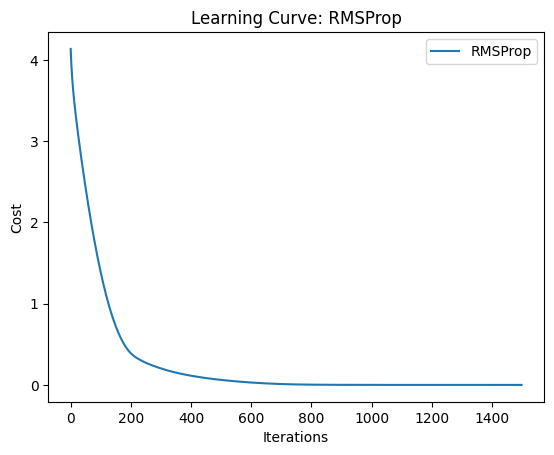

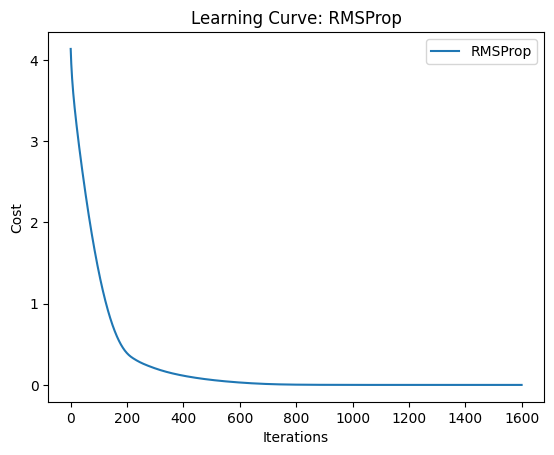

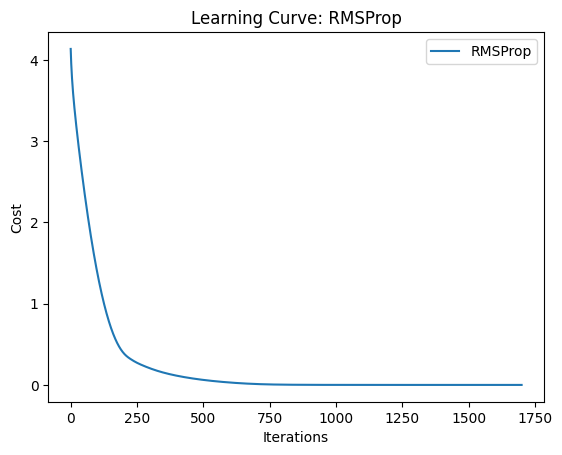

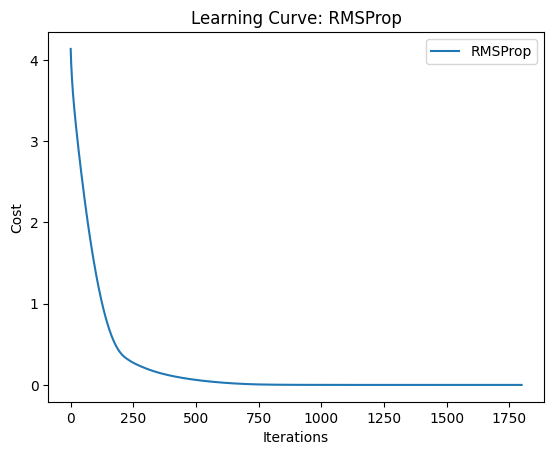

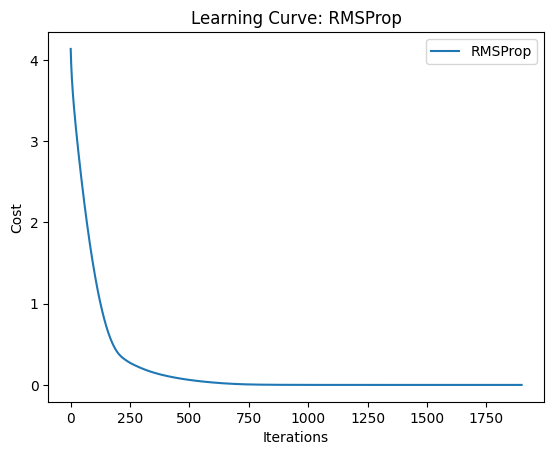

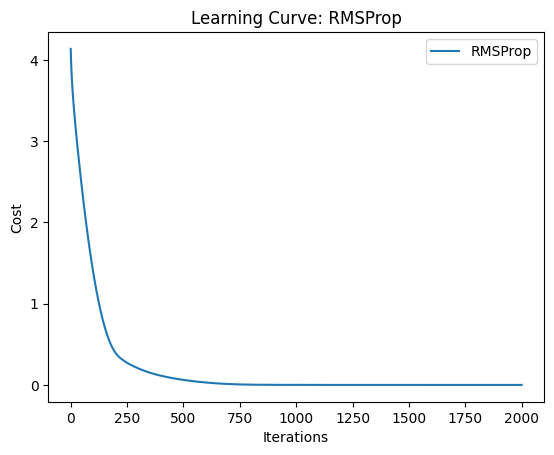

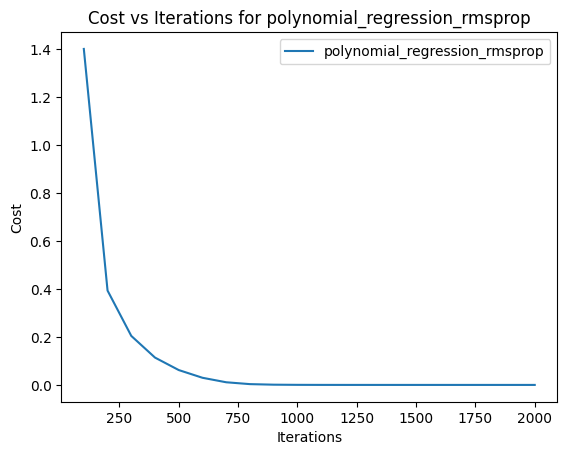

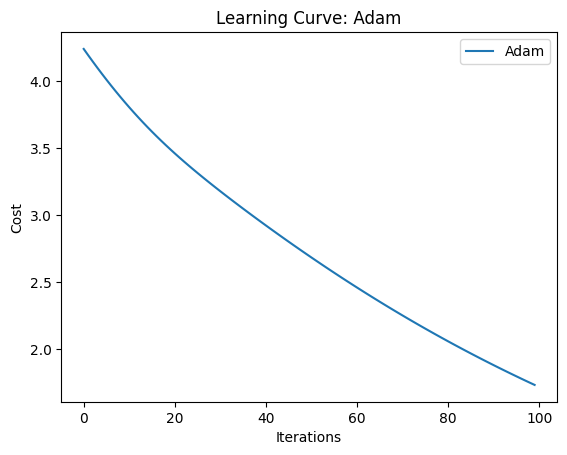

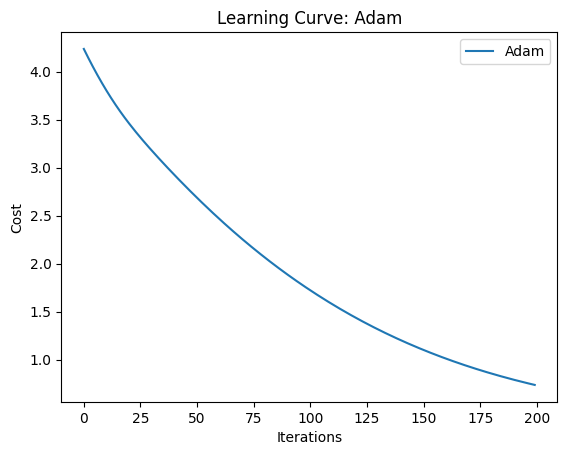

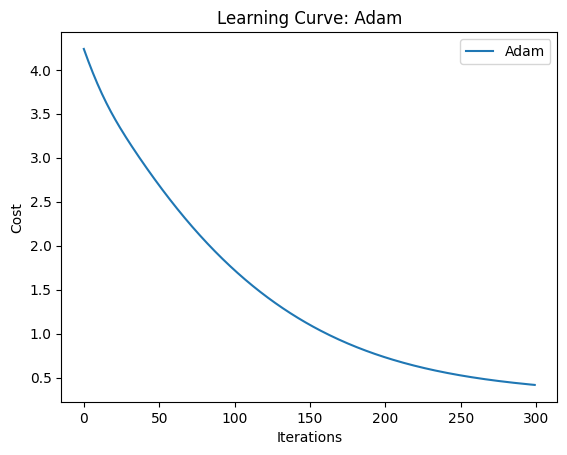

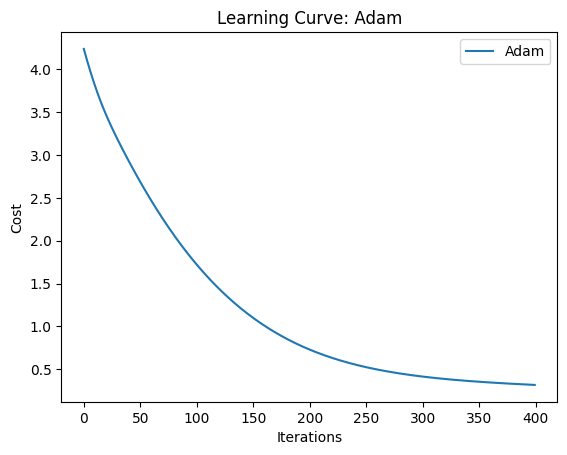

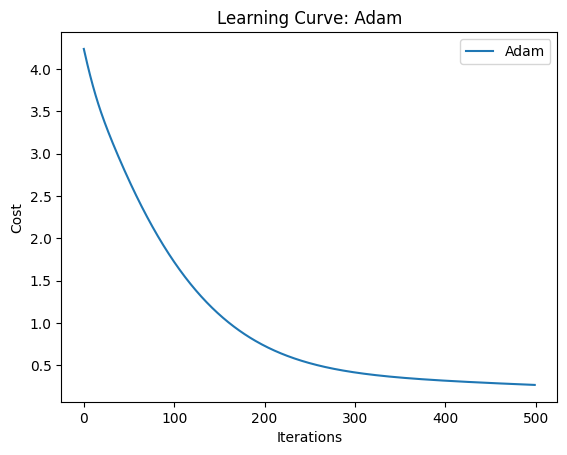

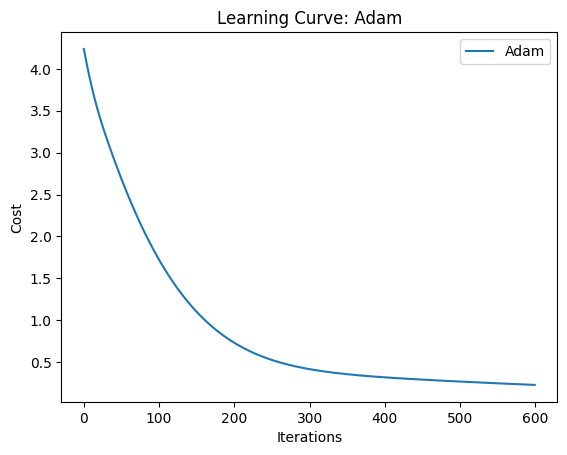

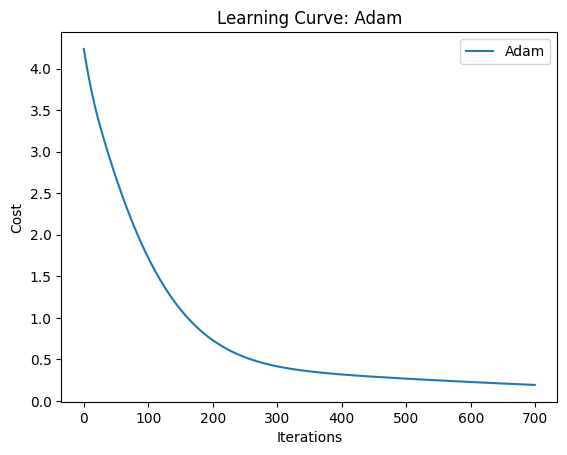

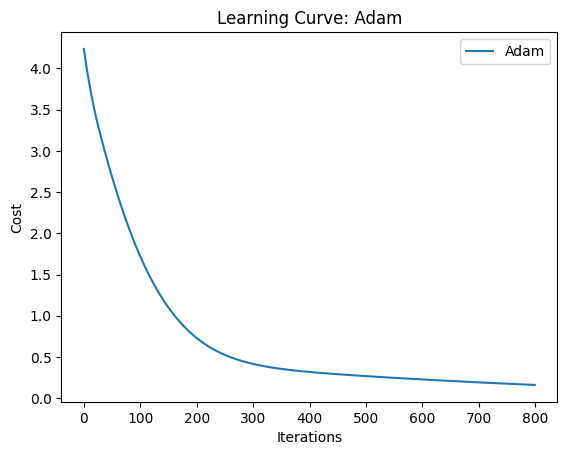

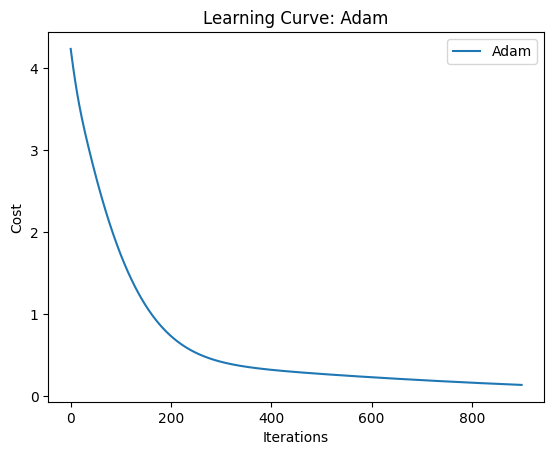

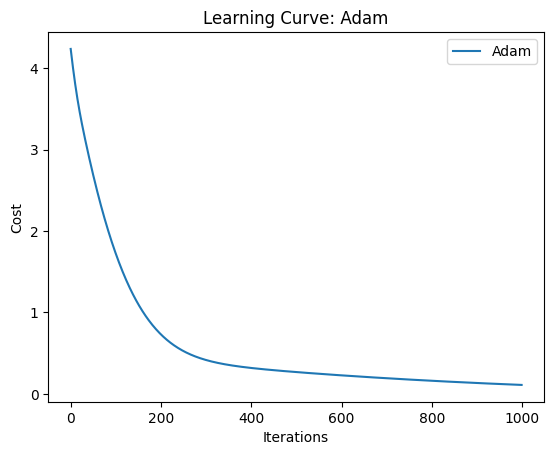

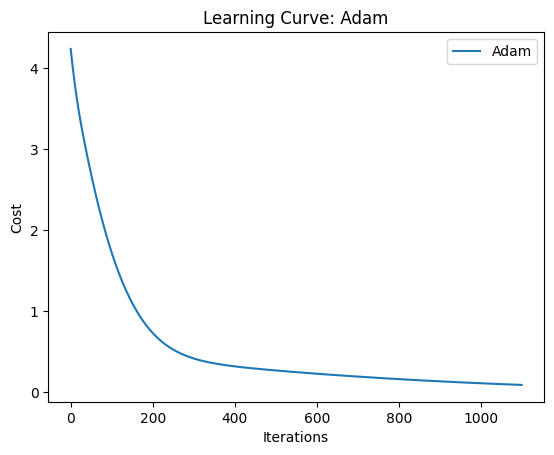

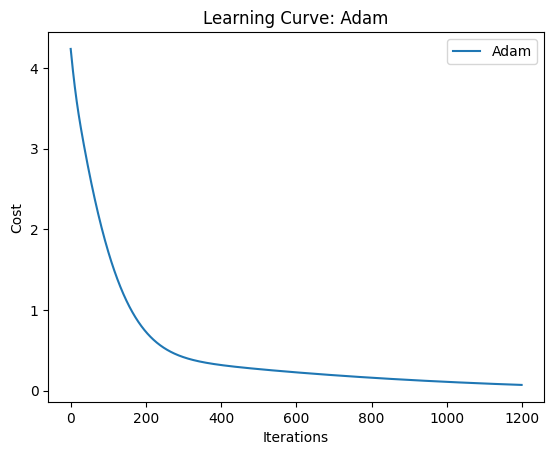

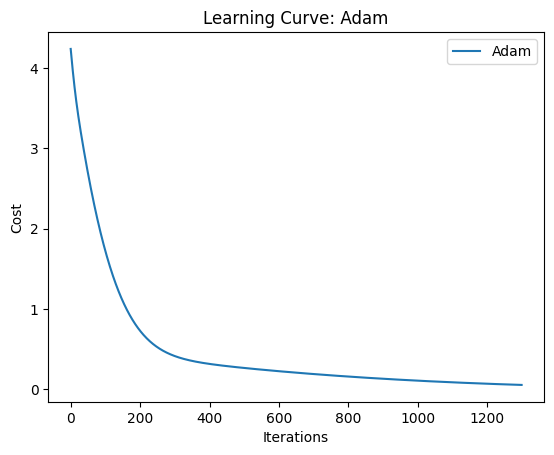

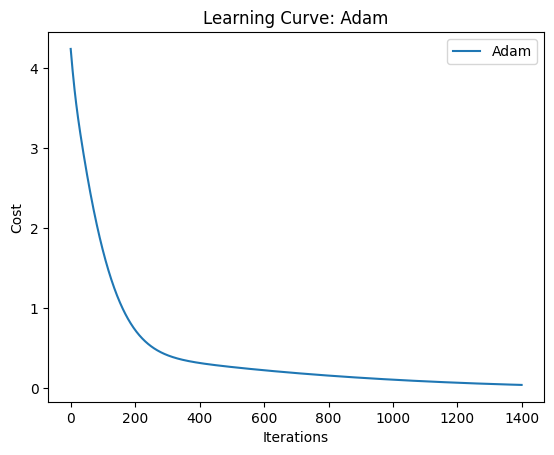

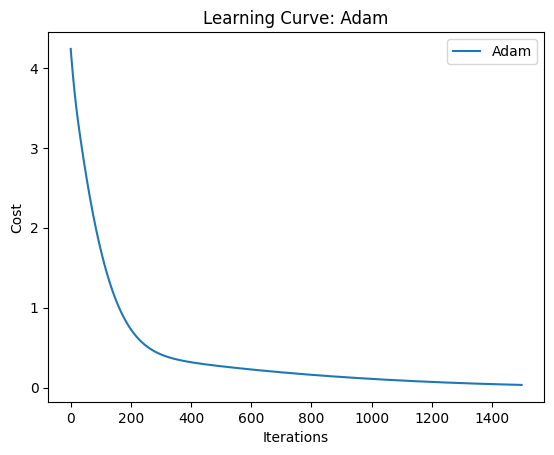

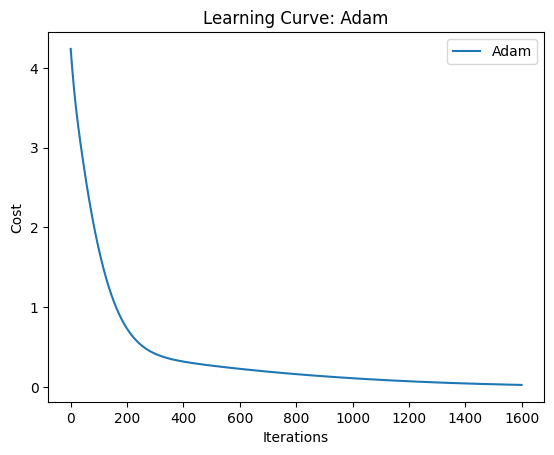

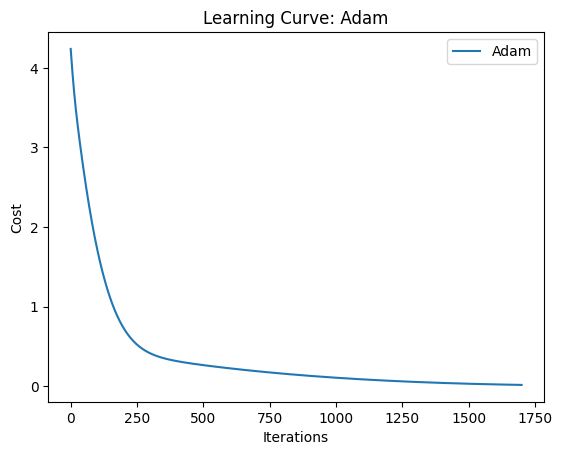

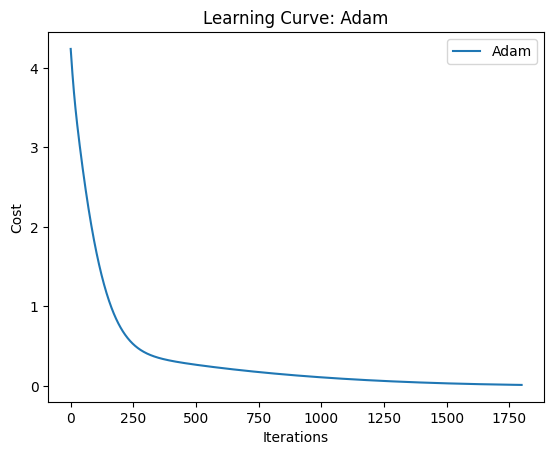

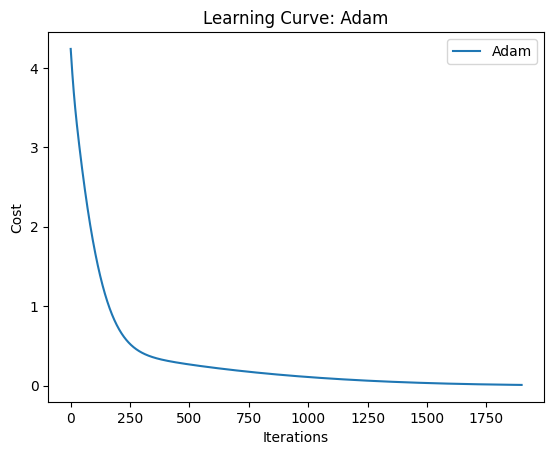

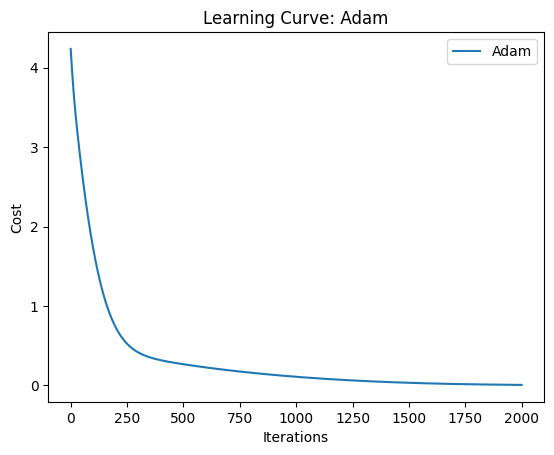

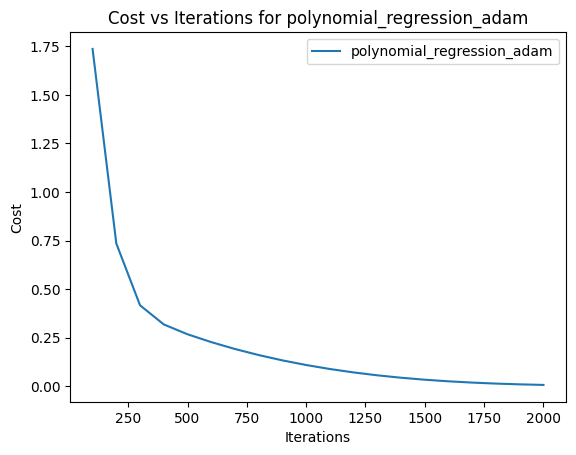

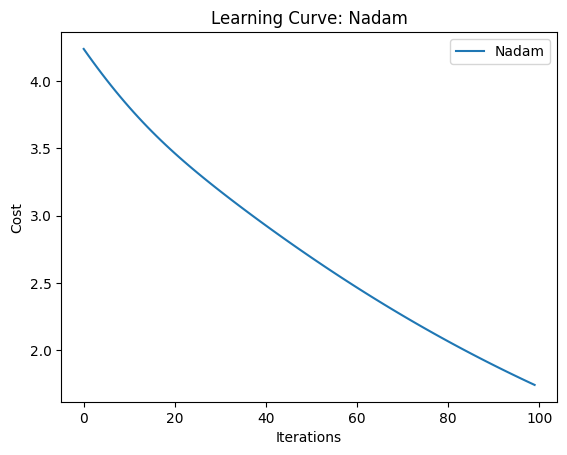

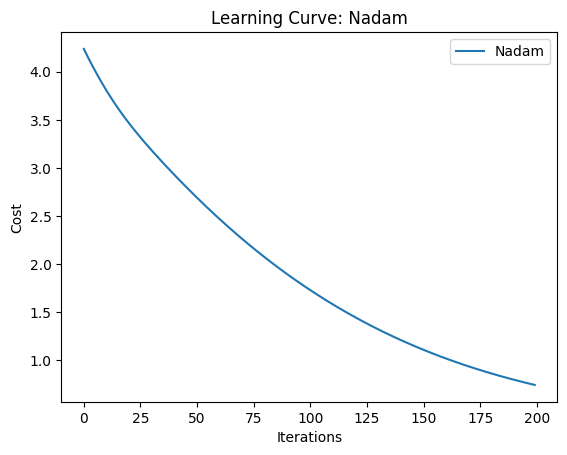

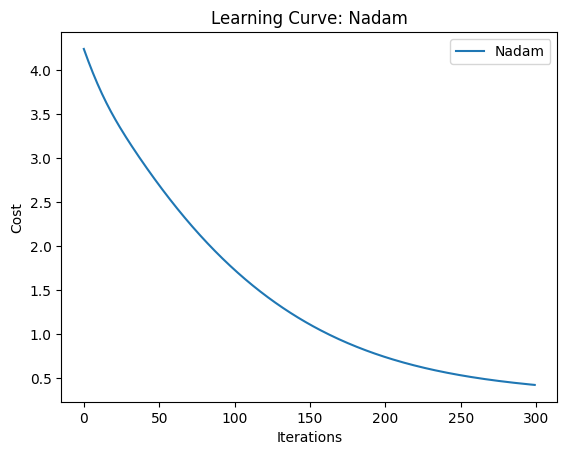

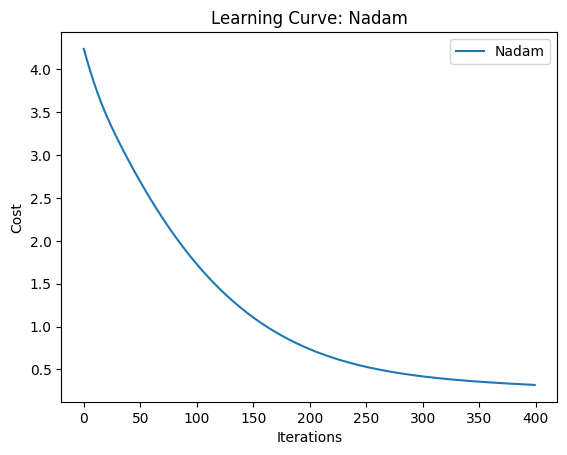

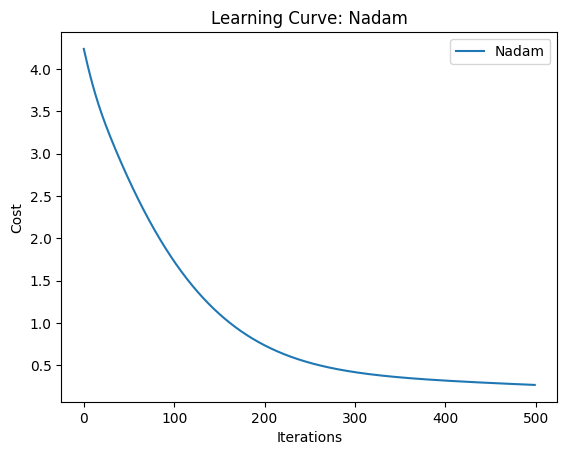

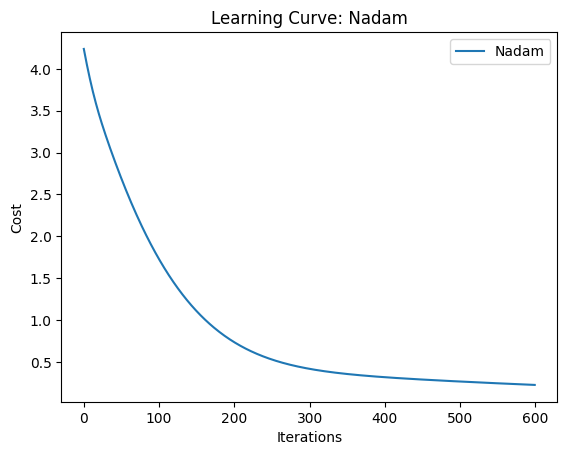

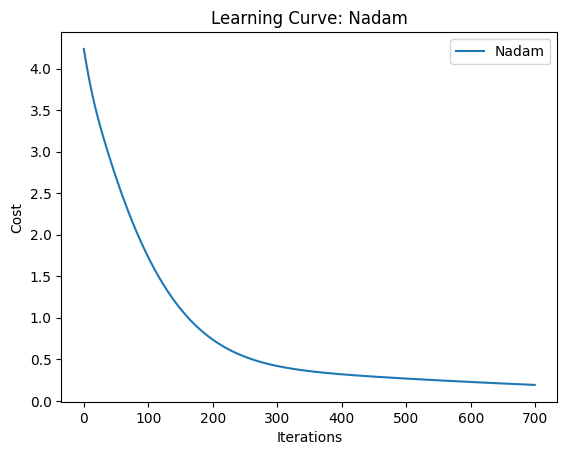

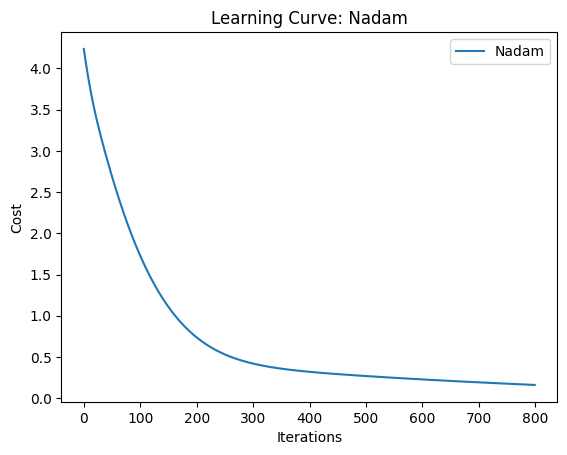

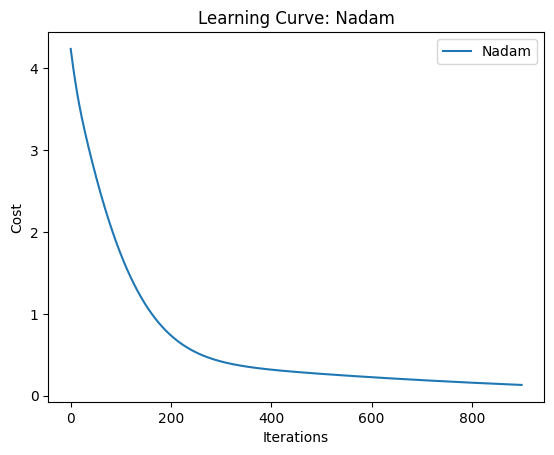

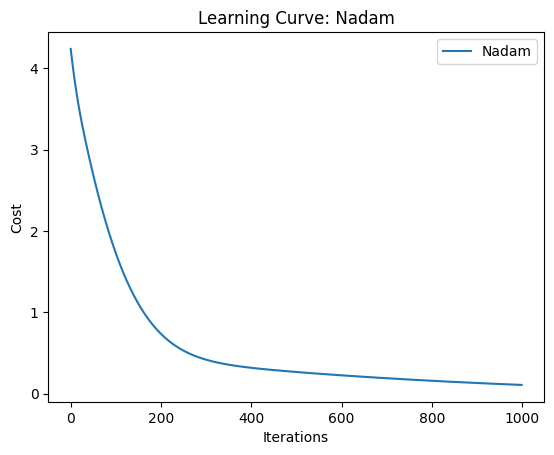

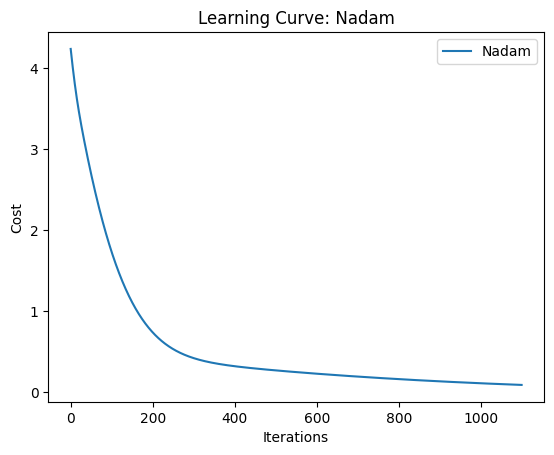

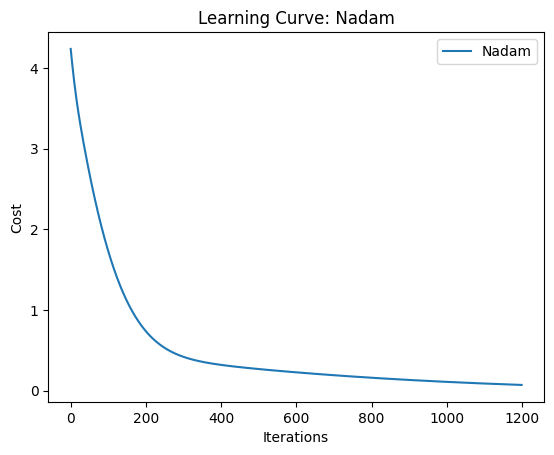

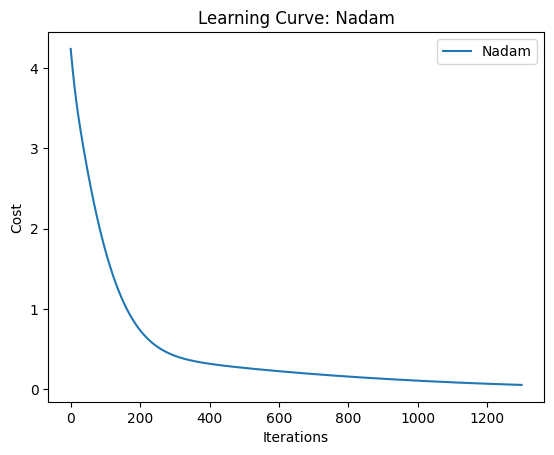

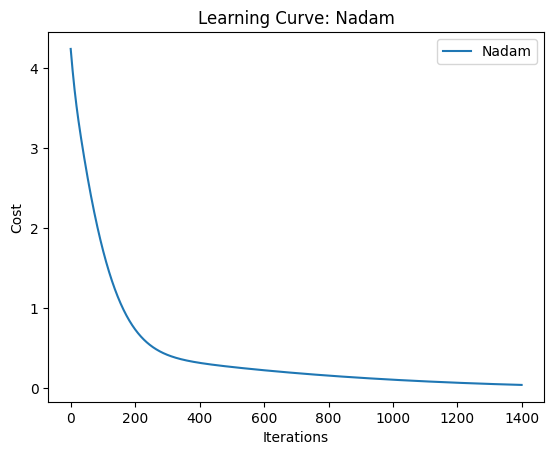

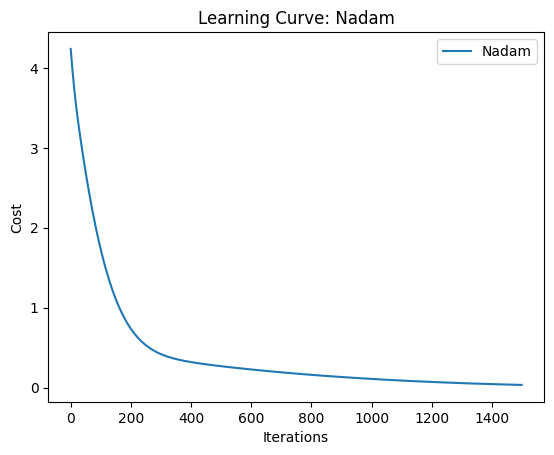

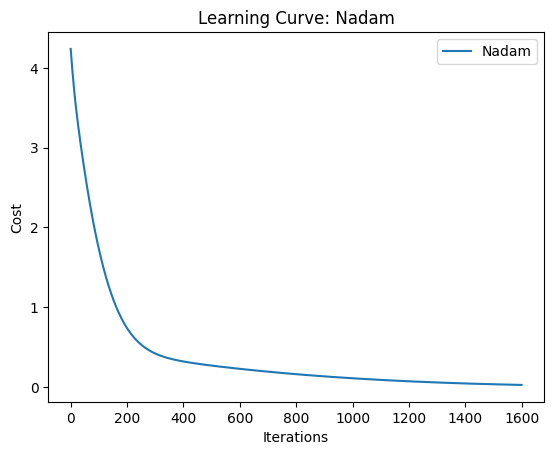

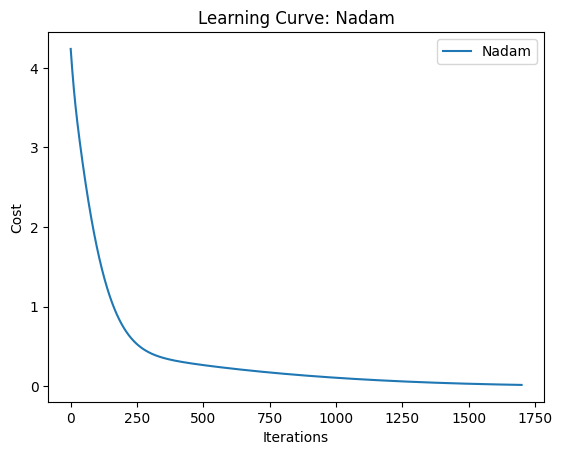

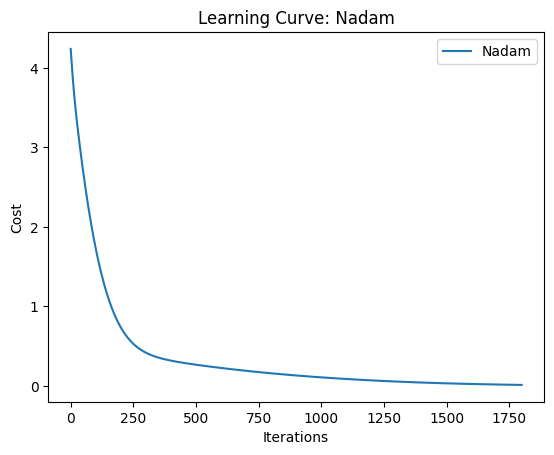

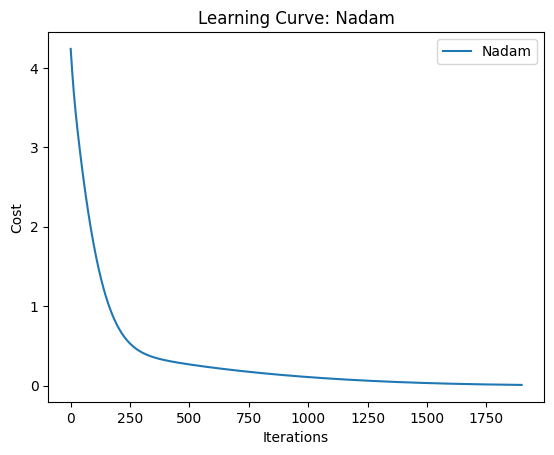

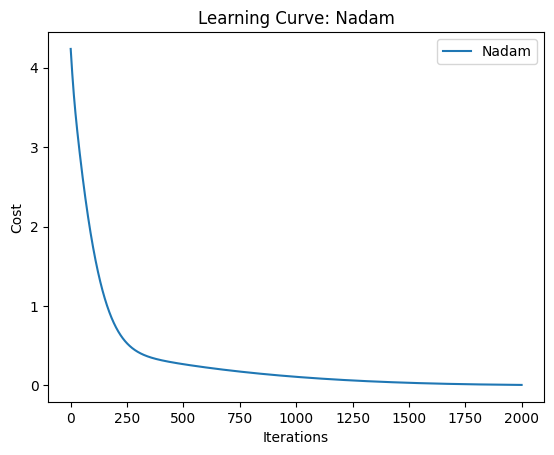

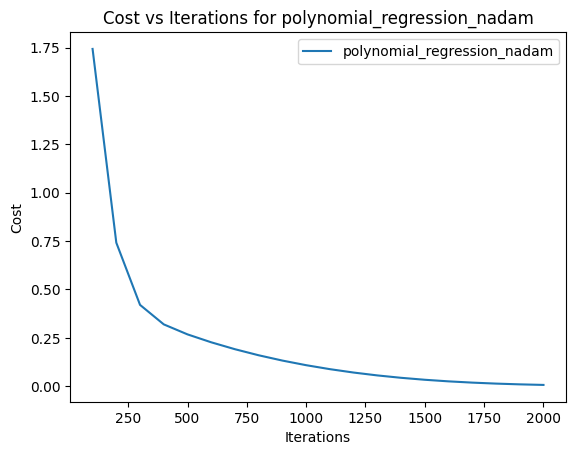

In [6]:
# Функція для підбору оптимальної кількості ітерацій
def find_optimal_iterations(method_func, X, y, max_iters=2000, step=100, lr=0.01):
    iteration_range = range(100, max_iters + 1, step)
    cost_history = []

    for iters in iteration_range:
        theta = method_func(X, y, lr=lr, iterations=iters)
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    # Візуалізація залежності кількості ітерацій від помилки
    plt.plot(iteration_range, cost_history, label=method_func.__name__)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title(f"Cost vs Iterations for {method_func.__name__}")
    plt.legend()
    plt.show()

# Тестування кожного методу
find_optimal_iterations(polynomial_regression_gradient_descent, X_poly, y, max_iters=2000, step=100, lr=0.01)
find_optimal_iterations(polynomial_regression_SGD, X_poly, y, max_iters=2000, step=100, lr=0.01)
find_optimal_iterations(polynomial_regression_rmsprop, X_poly, y, max_iters=2000, step=100, lr=0.01)
find_optimal_iterations(polynomial_regression_adam, X_poly, y, max_iters=2000, step=100, lr=0.01)
find_optimal_iterations(polynomial_regression_nadam, X_poly, y, max_iters=2000, step=100, lr=0.01)


### 6. Висновок про обчислювальну ефективність:
1. Gradient Descent (класичний градієнтний спуск):

  - Цей метод вимагає обчислення градієнтів на основі всього набору даних на кожній ітерації, що робить його менш ефективним для великих обсягів даних.
  - Для невеликих наборів даних метод працює стабільно і забезпечує плавне зменшення помилки, проте може бути повільнішим порівняно з іншими методами для великих наборів даних.
2. SGD (Стохастичний градієнтний спуск):

  - У кожній ітерації обирається один випадковий приклад, що робить цей метод значно швидшим, особливо для великих наборів даних.
  - Проте, через випадковість, поведінка методу може бути менш стабільною, і необхідно більше ітерацій для досягнення тієї ж точності, що й у класичного градієнтного спуску.
3. RMSProp:

  - Цей метод використовує адаптивний коефіцієнт навчання для кожного параметра, враховуючи попередні градієнти. Це дозволяє швидше збігатися і досягати меншої помилки порівняно з класичним градієнтним спуском.
  - RMSProp добре працює для задач із високою розмірністю, оскільки він забезпечує швидшу адаптацію швидкості навчання.
4. Adam:

  - Adam комбінує ідеї моментуму та RMSProp, що дозволяє йому швидко збігатися, особливо на нерівних поверхнях.
  - Метод ефективний і стабільний навіть на великих наборах даних, забезпечуючи баланс між швидкістю і точністю.
5. Nadam:

  - Це варіація Adam, яка використовує моментум Нестерова для ще швидшої збіжності.
  - Метод демонструє найкращі результати в задачах з високою варіативністю, забезпечуючи плавнішу траєкторію збігу.

### Загальні висновки:
  - Методи Adam і Nadam виявляються найбільш ефективними в плані швидкості збігу та адаптації до складних поверхонь функцій втрат.
  - Класичний градієнтний спуск є стабільним, але значно поступається в швидкості порівняно з адаптивними методами, такими як RMSProp, Adam, та Nadam.
  - SGD є швидким методом для великих наборів даних, але потребує більше ітерацій для досягнення точності.